<a href="https://colab.research.google.com/github/pranshutiwari/UWEC_CAPSTONE/blob/Master_Dev/Forecasting%2CBest_Model%2CMultivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
import gzip
import pandas as pdn
from urllib.request import urlopen
import keras
import rpy2
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from collections import defaultdict

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!apt-get install rar

!rar a "/content/drive/My Drive/Wisconsin_Project/superstore_dataset2011-2015.csv.zip"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (210 kB/s)
Selecting previously unselected package rar.
(Reading database ... 155202 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...

RAR 5.50   Copyright (c) 1993-2017 Alexander Roshal   11 Aug 2017
Trial version             Type 'rar -?' for he

In [4]:
!unzip "/content/drive/My Drive/Wisconsin_Project/superstore_dataset2011-2015.csv.zip"


Archive:  /content/drive/My Drive/Wisconsin_Project/superstore_dataset2011-2015.csv.zip
  inflating: superstore_dataset2011-2015.csv  


In [5]:
!unzip "/content/drive/My Drive/Wisconsin_Project/Combined_News_DJIA.csv.zip"

Archive:  /content/drive/My Drive/Wisconsin_Project/Combined_News_DJIA.csv.zip
  inflating: Combined_News_DJIA.csv  


In [6]:
import pandas as pd
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding= 'unicode_escape')
external_news=pd.read_csv('Combined_News_DJIA.csv')


In [7]:
external_news=pd.read_csv('Combined_News_DJIA.csv')

In [8]:
external_news.shape

(1989, 27)

In [9]:
external_news.tail(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1979,2016-06-20,1,A staggering 87 percent of Venezuelans say the...,Two corporate whistleblowers may enter into pl...,"Poland, together with Russia, Iran, and severa...",Three environmental activists were killed per ...,"Ontario funeral business dissolves the dead, p...",New Declassified Documents Reveal How CIA Abus...,Tens of thousands of people gathered in swelte...,Japan's dementia crisis hits record levels as ...,...,"Three dead, 45 injured as labor union clashes ...",Indonesia vows to stand firm after skirmishes ...,A study of ocean plankton has shown that an in...,Australia taxes foreign home buyers as afforda...,Paris isn't happy about Amazon's one-hour deli...,Australian man pleads guilty to making sexual ...,Trudeau condemns killing of 14 Canadian Embass...,Vladimir Putin is considering selling part of ...,An elephant has survived being shot in the hea...,Wikileaks founder Julian Assange marks 5 years...
1980,2016-06-21,1,An Australian athlete who has competed in six ...,Russian state television accidentally broadcas...,"In 2015, 50 environmentalists were killed in B...",China's plan to cut meat consumption by 50% ch...,Coral bleaching event now biggest in history ...,Super-rich quaff champagne in Venezuela countr...,Hong Kong bookseller refuses to be silenced af...,Chinese prosecutors have successfully sued a c...,...,Turkey charges Reporters Without Borders press...,Brussels: Bomb alert at shopping centre sparks...,Australian Paralympian Liesl Tesch robbed at g...,China issues orders to demolish Buddhist 'town...,Gazans squeezed by triple taxes as Hamas repla...,US and Russian fighters in dramatic showdown o...,Rising Tide of 'Politically Acceptable' Killin...,Mexico teachers protest: Six people are dead a...,Canada is set to launch a paid whistleblower p...,Russian football fan leader Alexander Shprygin...
1981,2016-06-22,0,German government agrees to ban fracking indef...,Teenage recruits were raped by staff and force...,Pakistan is selling nuclear materials to N Kor...,Amazon jaguar shot dead at Olympic torch ceremony,Mexican flags raised around Donald Trump's gol...,EU smashes 2020 emissions target six years ear...,Police kill eight striking Mexican teachers as...,Pro-choice activists have delivered abortion p...,...,Turkish students and graduates from 370 school...,"Japan Election Campaign Kicks off, Voting Age ...",Moscow has signed an agreement with Los Angele...,TEPCO admits meltdown cover-up - The president...,Indian State Grants Jews Minority Status - Ind...,Canadian Rescue Plane successfully reaches Sou...,The Swedish parliament on Tuesday voted in fav...,French police teargas migrants trying to board...,Qawwali musician Amjad Sabri was shot dead in ...,N. Korea launches what appears to be Musudan m...
1982,2016-06-23,1,Today The United Kingdom decides whether to re...,"E-cigarettes should not be banned in public, m...",Report: China is still harvesting organs from ...,"Man opens fire at cinema complex in Germany, s...","Erdoan: Europe, you dont want us because were ...",Asian millionaires now control more wealth tha...,A Japanese porn industry association has apolo...,University students are being warned when clas...,...,"Colombia, FARC announce full ceasefire, 'last ...",Gunmen kill Sufi devotional singer Amjad Sabri...,India launches 20 satellites in single mission,F-16s to be manufactured soon in an assembly l...,Australia's gun laws stopped mass shootings an...,French cement company in Syria buys oil from I...,Pope to visit Armenia after irking Turkey with...,Merkel says NATO must be strengthened,"China cracks down on online comments, click-ba...",The prime minister of India is set to get a br...
1983,2016-06-24,0,David Cameron to Resign as PM After EU Referendum,BBC forecasts UK votes to Leave the European U...,Nicola Sturgeon says a second independence ref...,It's official. Britain v

In [10]:
external_news.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [11]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [12]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [13]:
data['Market'].value_counts()


APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [14]:
data['Order Date'].dtype

dtype('O')

In [15]:
data.iloc[0:20067,2]

0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
20062    12/12/2014
20063    12/12/2014
20064    12/12/2014
20065    12/12/2014
20066    12/12/2014
Name: Order Date, Length: 20067, dtype: object

In [16]:
#standardization for 1st part of data 
data.iloc[0:20067,2]=pd.to_datetime(data.iloc[0:20067,2], format='%m/%d/%Y')#Y REPRESRENTS YEAR WITH CENTURY

In [17]:
#standardization for 2nd Part of data 
data.iloc[20068:,2]=pd.to_datetime(data.iloc[20068:,2], format='%d-%m-%Y')#Y

In [18]:
# Remove Time 
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.date

In [19]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [20]:
data["Order_Date_c"] = pd.to_datetime(data["Order Date"], utc=True)# convert into date to datetime object

In [21]:
data['Year']=data['Order_Date_c'].dt.strftime("%Y")# Only Order Year
data['Month']=data['Order_Date_c'].dt.strftime("%m")
data['Day']=data['Order_Date_c'].dt.strftime("%d")

In [22]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,0.0,106.140,35.46,Medium,2011-01-01 00:00:00+00:00,2011,01,01
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.036,9.72,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.640,8.17,High,2011-01-01 00:00:00+00:00,2011,01,01


In [23]:
#Creating a String and coverting into data time object and then extracting date 
validation_date = pd.to_datetime('2014-06-25').date()
validation_data = data.loc[data['Order Date']> validation_date]

In [24]:
persistency_date=pd.to_datetime('2014-01-01').date()
persistency_data=data.loc[(data['Order Date']> persistency_date) & (data['Order Date'] < validation_date)]

In [25]:
persistency_cohort=['Market','Category']
persistency_data_check=persistency_data.groupby(persistency_cohort).agg(History_Sales=('Sales',sum))

In [26]:
validation_data.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
51289,36388,CA-2014-156720,2014-12-31,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,3.024,3,0.2,-0.6048,0.17,Medium,2014-12-31 00:00:00+00:00,2014,12,31


EXTERNAL NEWS DATA SET PREPERATION

In [27]:
start_date='2011-01-01'
end_training_date='2014-06-25'
end_date='2014-12-31'
start=pd.to_datetime(start_date)
end_tr=pd.to_datetime(end_training_date)
end_d=pd.to_datetime(end_date)
external_news_project=external_news[(external_news['Date']>start_date) &(external_news['Date']< end_training_date)]

In [28]:
external_news_project.head(2)
external_news_project.drop(["Label"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
external_news_project.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
605,2011-01-03,Wikileaks releases cable of the July 1990 meet...,"""The WikiLeaks saga has a message . . . Your d...",7.1 magnitude earthquake hits Chile.,Lack of Jobs in Southern Europe Frustrates the...,The Village Where the Neo-Nazis Rule. Hitler ...,Settlers set fire to home as seven Palestinian...,Actor Pete Postlethwaite dies :(,"WikiLeaks: Israel Plans Total War on Lebanon, ...",Leaks reveal USA and Germany are collaborating...,...,Anonymous lends a hand to Tunisian protesters:...,N Korea to spend 100 million on new offices &a...,'The English language has almost doubled in si...,China boasts breakthrough in nuclear technology,Investigation closes in on German weapons comp...,Ugandan high court rules Rolling Stone newspap...,Japan Pushes Away Skilled Immigrants Despite A...,"Anticipating a WikiLeaks disclosure, Bank of A...",Greece decides to construct a fence along its ...,Israel extends a six-month ban on the immigrat...
606,2011-01-04,Punjab(Pakistan) governor Salman Taseer assass...,Some Christians have predicted the end of days...,"If Youre Homeless In Japan, Here Are Your Options",And so it starts...Sri Lanka considers banning...,Saudi Arabia announces that all online publish...,A 15-year-old girl is more likely to die in ch...,As Hungary takes over the rotating presidency ...,WikiLeaks: Drug Enforcement Agency Goes \nGlob...,A huge Dragon tower to be built on border betw...,...,Reynaldo Dagsa was taking a picture of his fam...,Volunteer Cyber Army Emerges in Estonia.,Cartels carve bloody swath through Central Ame...,Greece plans to build a 12.5km fence at border...,Argentina's 'impressive' bank heist - Al Jaze...,Iran invites nations to nuclear plants: \nIran...,Japan to Propose Closer Military Ties With S. ...,"Crocodiles, snakes are danger in flooded Austr...",U.S. agents are armed with insider information...,Mountain Revolt - Bavarian Farmers Threaten Bi...


In [30]:
validation_data.index

Int64Index([16589, 16590, 16591, 16592, 16593, 16594, 16595, 16596, 16597,
            16598,
            ...
            51280, 51281, 51282, 51283, 51284, 51285, 51286, 51287, 51288,
            51289],
           dtype='int64', length=10186)

In [31]:
validation_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order_Date_c', 'Year',
       'Month', 'Day'],
      dtype='object')

In [32]:
training_data = data.drop(labels=validation_data.index, axis=0)

In [33]:
training_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,0.0,106.140,35.46,Medium,2011-01-01 00:00:00+00:00,2011,01,01
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.036,9.72,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.640,8.17,High,2011-01-01 00:00:00+00:00,2011,01,01


In [34]:
training_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,0.0,106.1400,35.46,Medium,2011-01-01 00:00:00+00:00,2011,01,01
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.0360,9.72,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.6400,8.17,High,2011-01-01 00:00:00+00:00,2011,01,01
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,44.865,3,0.5,-26.0550,4.82,High,2011-01-01 00:00:00+00:00,2011,01,01
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,113.670,5,0.1,37.7700,4.70,Medium,2011-01-01 00:00:00+00:00,2011,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51223,42653,TU-2013-9400,2013-12-31,4/1/2014,Standard Class,TM-11490,Tony Molinari,Consumer,Gaziantep,Gaziantep,...,10.080,1,0.6,-5.5500,0.59,Medium,2013-12-31 00:00:00+00:00,2013,12,31
51224,39963,CA-2013-163951,2013-12-31,3/1/2014,First Class,CJ-11875,Carl Jackson,Corporate,Philadelphia,Pennsylvania,...,16.520,5,0.2,1.6520,0.42,High,2013-12-31 00:00:00+00:00,2013,12,31
51225,37057,US-2013-111528,2013-12-31,31-12-2013,Same Day,JP-16135,Julie Prescott,Home Office,Los Angeles,California,...,6.384,1,0.2,2.1546,0.34,Medium,2013-12-31 00:00:00+00:00,2013,12,31
51226,36058,CA-2013-117660,2013-12-31,5/1/2014,Standard Class,BM-11785,Bryan Mills,Consumer,Columbus,Ohio,...,5.904,2,0.2,1.9926,0.23,Medium,2013-12-31 00:00:00+00:00,2013,12,31


In [35]:
training_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            51218, 51219, 51220, 51221, 51222, 51223, 51224, 51225, 51226,
            51227],
           dtype='int64', length=41104)

In [36]:
training_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order_Date_c', 'Year',
       'Month', 'Day'],
      dtype='object')

In [37]:
consumer_vector=['Region',"Market","Country","Category","Year","Month"]

In [38]:
consumer_vector2=['Region',"Market","Country","Category"]

In [39]:
df_cv=training_data.groupby(consumer_vector2)['Order Date'].count().reset_index().rename(columns={'Order Date':'Series_Length'})

In [40]:
df_cv

,Region,Market,Country,Category,Series_Length
0,Africa,Africa,Algeria,Furniture,21
1,Africa,Africa,Algeria,Office Supplies,104
2,Africa,Africa,Algeria,Technology,26
3,Africa,Africa,Angola,Furniture,18
4,Africa,Africa,Angola,Office Supplies,62
...,...,...,...,...,...
423,Southeast Asia,APAC,Vietnam,Office Supplies,119
424,Southeast Asia,APAC,Vietnam,Technology,54
425,West,US,United States,Furniture,572
426,West,US,United States,Office Supplies,1528


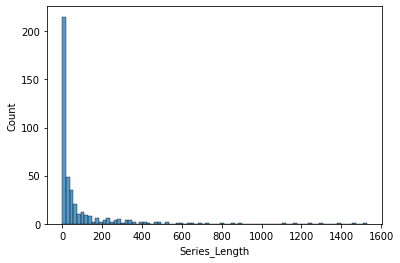

In [41]:
sns.histplot(df_cv['Series_Length'])

In [42]:
Vector2=["Market","Category"]

In [43]:
valid_data=validation_data.groupby(consumer_vector).agg(Monthly_Quantity=('Sales','sum')).reset_index()

In [44]:
df1=training_data.groupby(Vector2)['Order Date'].count().reset_index().rename(columns={'Order Date':'Series_Length'})


In [45]:
df2=training_data.groupby(Vector2)["Sales"].apply(lambda column: ((column == 0)/column.count()).sum()).reset_index().reset_index().rename(columns={'Sales':' NullDemand_level'})


In [46]:
df3=training_data.groupby(Vector2)["Sales"].apply(lambda x: np.std(x, ddof=1) / (np.mean(x)) * 100 ).reset_index().rename(columns={'Sales':'Variability'})

In [47]:
df_temp =[df.set_index(Vector2) for df in [df1,df2,df3]]
df_temp =[df.set_index(Vector2) for df in [df1,df2,df3]]
df_fet = pd.concat(df_temp, axis=1).reset_index()

In [48]:
df_fet

,Market,Category,Series_Length,index,NullDemand_level,Variability
0,APAC,Furniture,1947,0,0.0,122.077630
1,APAC,Office Supplies,4951,1,0.0,222.802943
2,APAC,Technology,1958,2,0.0,118.541579
3,Africa,Furniture,507,3,0.0,147.741891
4,Africa,Office Supplies,2458,4,0.0,213.835110
5,Africa,Technology,744,5,0.0,156.795959
6,Canada,Furniture,36,6,0.0,100.054706
7,Canada,Office Supplies,218,7,0.0,197.413338
8,Canada,Technology,54,8,0.0,106.765316
9,EMEA,Furniture,603,9,0.0,144.617527


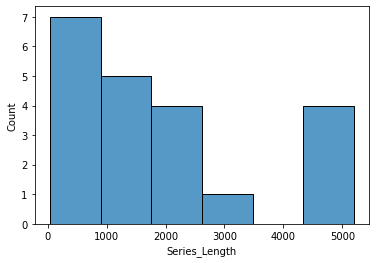

In [49]:
sns.histplot(df_fet['Series_Length'])

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [51]:
df_fet["Market"] = df_fet["Market"].astype('category')
df_fet["Market"] =df_fet["Market"].cat.codes
df_fet["Category"]=df_fet["Category"].astype('category')
df_fet["Category"]=df_fet["Category"].cat.codes

In [52]:
df2=df_fet.iloc[:,[0,1,2,4,5]]

In [53]:
df2

,Market,Category,Series_Length,NullDemand_level,Variability
0,0,0,1947,0.0,122.077630
1,0,1,4951,0.0,222.802943
2,0,2,1958,0.0,118.541579
3,1,0,507,0.0,147.741891
4,1,1,2458,0.0,213.835110
5,1,2,744,0.0,156.795959
6,2,0,36,0.0,100.054706
7,2,1,218,0.0,197.413338
8,2,2,54,0.0,106.765316
9,3,0,603,0.0,144.617527


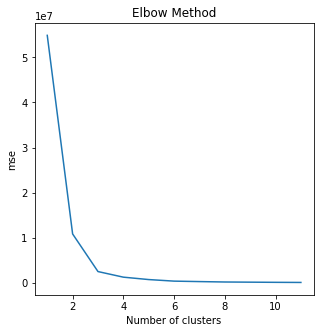

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_train=df2.iloc[:,0:]
mse = []
#Fitting on Training data 
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,  random_state=0,init='k-means++')
    kmeans.fit(X_train)
    mse.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(range(1, 12), mse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mse')
plt.show()

[[3.75000000e+00 1.00000000e+00 4.94275000e+03 0.00000000e+00
  2.44242444e+02]
 [2.82352941e+00 1.00000000e+00 1.25488235e+03 0.00000000e+00
  1.49642497e+02]]


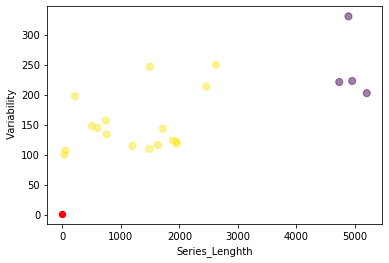

In [55]:
kmeans = KMeans(n_clusters=2).fit(X_train)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X_train['Series_Length'], X_train['Variability'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.xlabel('Series_Lenghth')
plt.ylabel(' Variability')
plt.show()
  

In [56]:
kmeans.fit(X_train)
predict=kmeans.predict(X_train)

In [57]:
predict
X_train['Cluster_Flag'] = pd.Series(predict, index=X_train.index)

In [58]:
X_train

,Market,Category,Series_Length,NullDemand_level,Variability,Cluster_Flag
0,0,0,1947,0.0,122.077630,1
1,0,1,4951,0.0,222.802943,0
2,0,2,1958,0.0,118.541579,1
3,1,0,507,0.0,147.741891,1
4,1,1,2458,0.0,213.835110,1
5,1,2,744,0.0,156.795959,1
6,2,0,36,0.0,100.054706,1
7,2,1,218,0.0,197.413338,1
8,2,2,54,0.0,106.765316,1
9,3,0,603,0.0,144.617527,1


In [59]:
training_data.index= pd.DatetimeIndex(training_data['Order Date'])
training_data2=training_data.drop('Order Date',axis=1)

In [60]:
validation_data.index=pd.DatetimeIndex(validation_data['Order Date'])
validation_data2=validation_data.drop('Order Date',axis=1)

In [61]:
training_data2.groupby(Vector2).count().reset_index().rename(columns={'Sales':'Series_Length'})


,Market,Category,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Series_Length,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
0,APAC,Furniture,1947,1947,1947,1947,1947,1947,1947,1947,...,1947,1947,1947,1947,1947,1947,1947,1947,1947,1947
1,APAC,Office Supplies,4951,4951,4951,4951,4951,4951,4951,4951,...,4951,4951,4951,4951,4951,4951,4951,4951,4951,4951
2,APAC,Technology,1958,1958,1958,1958,1958,1958,1958,1958,...,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958
3,Africa,Furniture,507,507,507,507,507,507,507,507,...,507,507,507,507,507,507,507,507,507,507
4,Africa,Office Supplies,2458,2458,2458,2458,2458,2458,2458,2458,...,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458
5,Africa,Technology,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744
6,Canada,Furniture,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
7,Canada,Office Supplies,218,218,218,218,218,218,218,218,...,218,218,218,218,218,218,218,218,218,218
8,Canada,Technology,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
9,EMEA,Furniture,603,603,603,603,603,603,603,603,...,603,603,603,603,603,603,603,603,603,603


In [62]:
Market_List=training_data2['Market'].unique()
Market_List

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [63]:
cohort_1=training_data2[(training_data2['Market']=='US') & (training_data2['Category']=='Office Supplies')]

In [64]:
cohort_2=training_data2[(training_data2['Market']=='US') & (training_data2['Category']=='Technology')]

In [65]:
cohort_3=training_data2[(training_data2['Market']=='US') & (training_data2['Category']=='Furniture')]

In [66]:
cohort_4=training_data2[(training_data2['Market']=='EMEA') & (training_data2['Category']=='Technology')]



In [67]:
monthly_cohort_1=cohort_1.resample('m').sum()

In [68]:
monthly_cohort_2=cohort_2.resample('m').sum()

In [69]:
monthly_cohort_3=cohort_3.resample('m').sum()

In [70]:
weekly_cohort=cohort_1.resample('W').mean()

In [71]:
weekly_cohort2=cohort_2.resample('W').mean()

In [72]:
x_week=weekly_cohort['Sales']

In [73]:
type(training_data2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [74]:
x_m_1=monthly_cohort_1['Sales']
x_m_2=monthly_cohort_2['Sales']
x_m_3=monthly_cohort_2['Sales']

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x_m_1, lags=30, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x_m_1, lags=30, zero=False, ax=ax2)


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


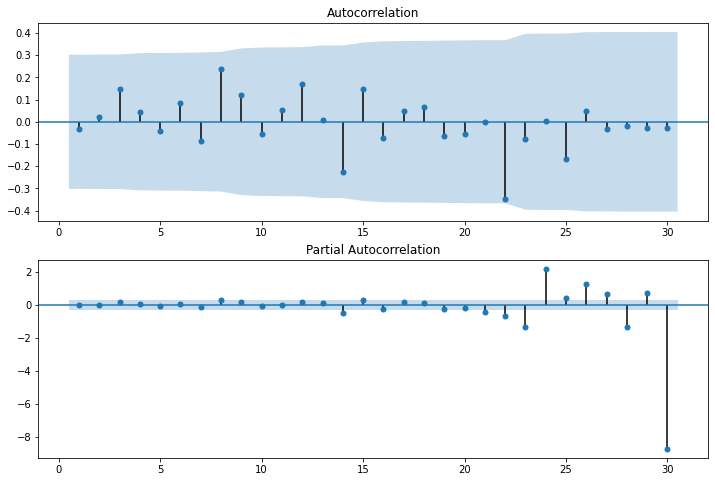

In [77]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x_m_2, lags=30, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
ax2.set_title("Technology")
fig = sm.graphics.tsa.plot_pacf(x_m_2, lags=30, zero=False, ax=ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


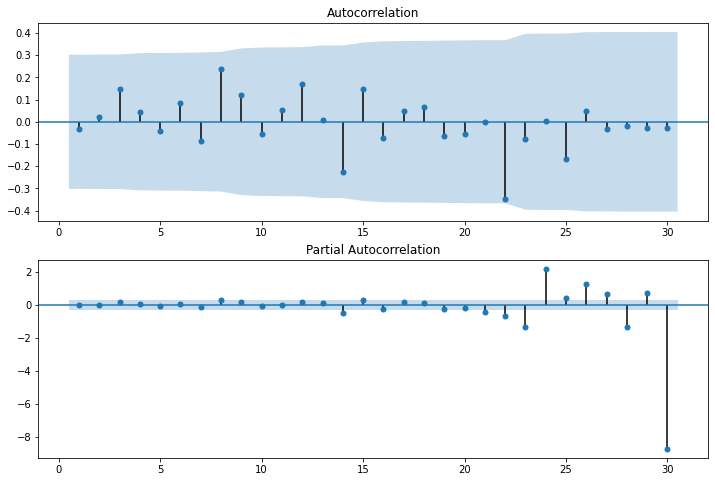

In [78]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x_m_3, lags=30, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
ax2.set_title("Technology")
fig = sm.graphics.tsa.plot_pacf(x_m_3, lags=30, zero=False, ax=ax2)

In [79]:
x_m_3,

(Order Date
 2011-01-31     7931.580
 2011-02-28     6484.728
 2011-03-31    33152.762
 2011-04-30     9425.530
 2011-05-31     7595.200
 2011-06-30     6741.179
 2011-07-31     8539.334
 2011-08-31    16900.912
 2011-09-30    24338.380
 2011-10-31    12865.386
 2011-11-30    20742.904
 2011-12-31    20560.338
 2012-01-31     6974.476
 2012-02-29     6845.640
 2012-03-31     9791.866
 2012-04-30    15310.406
 2012-05-31     7328.590
 2012-06-30     9581.120
 2012-07-31    10024.190
 2012-08-31    24198.782
 2012-09-30    22681.540
 2012-10-31     9166.250
 2012-11-30    11836.373
 2012-12-31    29041.576
 2013-01-31     4212.320
 2013-02-28    19287.712
 2013-03-31    28439.960
 2013-04-30    16688.356
 2013-05-31    34929.566
 2013-06-30    12211.458
 2013-07-31    15602.789
 2013-08-31    19152.620
 2013-09-30    12449.212
 2013-10-31     9235.440
 2013-11-30    33057.445
 2013-12-31    20794.926
 2014-01-31    22858.943
 2014-02-28    15121.738
 2014-03-31    38463.480
 2014-04-30  

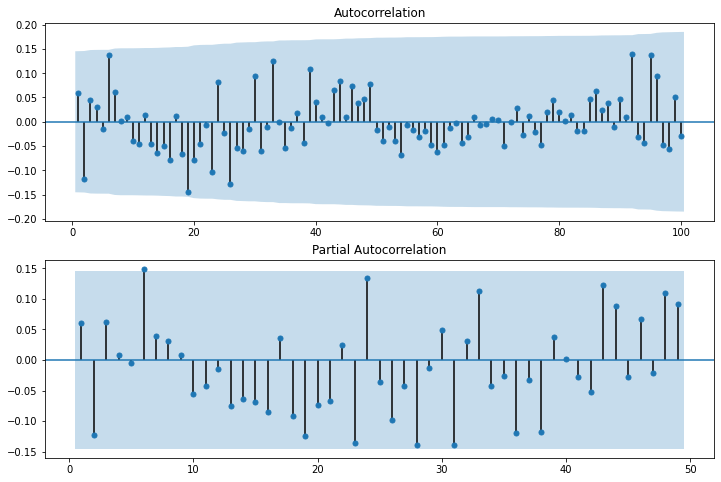

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x_week, lags=100, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x_week, lags=49, zero=False, ax=ax2)

## AUTO CORRELATION PLOT OF WEEKLY DATA 

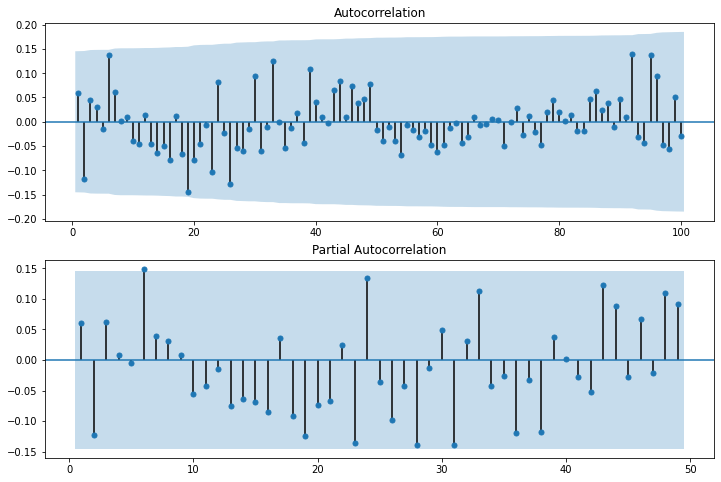

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x_week, lags=100, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x_week, lags=49, zero=False, ax=ax2)

In [82]:
consumer_vector=['Region','Market','Category','Country','Year','Month']

In [83]:
training_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,0.0,106.1400,35.46,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2011-01-01,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.0360,9.72,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2011-01-01,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.6400,8.17,High,2011-01-01 00:00:00+00:00,2011,01,01
2011-01-01,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,44.865,3,0.5,-26.0550,4.82,High,2011-01-01 00:00:00+00:00,2011,01,01
2011-01-01,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,113.670,5,0.1,37.7700,4.70,Medium,2011-01-01 00:00:00+00:00,2011,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,42653,TU-2013-9400,2013-12-31,4/1/2014,Standard Class,TM-11490,Tony Molinari,Consumer,Gaziantep,Gaziantep,...,10.080,1,0.6,-5.5500,0.59,Medium,2013-12-31 00:00:00+00:00,2013,12,31
2013-12-31,39963,CA-2013-163951,2013-12-31,3/1/2014,First Class,CJ-11875,Carl Jackson,Corporate,Philadelphia,Pennsylvania,...,16.520,5,0.2,1.6520,0.42,High,2013-12-31 00:00:00+00:00,2013,12,31
2013-12-31,37057,US-2013-111528,2013-12-31,31-12-2013,Same Day,JP-16135,Julie Prescott,Home Office,Los Angeles,California,...,6.384,1,0.2,2.1546,0.34,Medium,2013-12-31 00:00:00+00:00,2013,12,31


In [84]:
from numpy.core.fromnumeric import mean
data3=training_data.groupby(consumer_vector).agg(Monthly_Quantity=('Sales','sum')).reset_index()

In [85]:
data3['Region'].unique()

array(['Africa', 'Canada', 'Caribbean', 'Central', 'Central Asia', 'EMEA',
       'East', 'North', 'North Asia', 'Oceania', 'South',
       'Southeast Asia', 'West'], dtype=object)

In [86]:
data3

,Region,Market,Category,Country,Year,Month,Monthly_Quantity
0,Africa,Africa,Furniture,Algeria,2011,03,113.280
1,Africa,Africa,Furniture,Algeria,2011,04,298.680
2,Africa,Africa,Furniture,Algeria,2011,05,874.680
3,Africa,Africa,Furniture,Algeria,2011,12,418.050
4,Africa,Africa,Furniture,Algeria,2012,03,319.770
...,...,...,...,...,...,...,...
7268,West,US,Technology,United States,2014,02,8786.126
7269,West,US,Technology,United States,2014,03,19522.566
7270,West,US,Technology,United States,2014,04,10548.355
7271,West,US,Technology,United States,2014,05,4638.646


In [87]:
data3

,Region,Market,Category,Country,Year,Month,Monthly_Quantity
0,Africa,Africa,Furniture,Algeria,2011,03,113.280
1,Africa,Africa,Furniture,Algeria,2011,04,298.680
2,Africa,Africa,Furniture,Algeria,2011,05,874.680
3,Africa,Africa,Furniture,Algeria,2011,12,418.050
4,Africa,Africa,Furniture,Algeria,2012,03,319.770
...,...,...,...,...,...,...,...
7268,West,US,Technology,United States,2014,02,8786.126
7269,West,US,Technology,United States,2014,03,19522.566
7270,West,US,Technology,United States,2014,04,10548.355
7271,West,US,Technology,United States,2014,05,4638.646


In [88]:
data3['Category'].value_counts()

Office Supplies    3045
Technology         2162
Furniture          2066
Name: Category, dtype: int64

In [89]:
data4=data3[(data3['Region']=='West') & (data3['Category']=='Furniture')]

In [90]:
pd.to_datetime(data4.loc[:,['Year','Month']].assign(DAY=1))

7147   2011-01-01
7148   2011-02-01
7149   2011-03-01
7150   2011-04-01
7151   2011-05-01
7152   2011-06-01
7153   2011-07-01
7154   2011-08-01
7155   2011-09-01
7156   2011-10-01
7157   2011-11-01
7158   2011-12-01
7159   2012-01-01
7160   2012-02-01
7161   2012-03-01
7162   2012-04-01
7163   2012-05-01
7164   2012-06-01
7165   2012-07-01
7166   2012-08-01
7167   2012-09-01
7168   2012-10-01
7169   2012-11-01
7170   2012-12-01
7171   2013-01-01
7172   2013-02-01
7173   2013-03-01
7174   2013-04-01
7175   2013-05-01
7176   2013-06-01
7177   2013-07-01
7178   2013-08-01
7179   2013-09-01
7180   2013-10-01
7181   2013-11-01
7182   2013-12-01
7183   2014-01-01
7184   2014-02-01
7185   2014-03-01
7186   2014-04-01
7187   2014-05-01
7188   2014-06-01
dtype: datetime64[ns]

In [91]:
data4=data3[(data3['Region']=='West') & (data3['Category']=='Furniture')]
data4['Synthetic_Date'] = pd.to_datetime(data4.loc[:,['Year','Month']].assign(DAY=1))
data4.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(42, 8)

In [92]:
data4

,Region,Market,Category,Country,Year,Month,Monthly_Quantity,Synthetic_Date
7147,West,US,Furniture,United States,2011,01,1674.2030,2011-01-01
7148,West,US,Furniture,United States,2011,02,202.8880,2011-02-01
7149,West,US,Furniture,United States,2011,03,3496.5940,2011-03-01
7150,West,US,Furniture,United States,2011,04,2965.6380,2011-04-01
7151,West,US,Furniture,United States,2011,05,1955.6020,2011-05-01
7152,West,US,Furniture,United States,2011,06,2032.8220,2011-06-01
7153,West,US,Furniture,United States,2011,07,5836.9660,2011-07-01
7154,West,US,Furniture,United States,2011,08,3830.8080,2011-08-01
7155,West,US,Furniture,United States,2011,09,6603.5670,2011-09-01
7156,West,US,Furniture,United States,2011,10,4470.3000,2011-10-01


In [93]:
#data4=data3[(data3['Region']=='West') & (data3['Category']=='Furniture')]

In [94]:
data4

,Region,Market,Category,Country,Year,Month,Monthly_Quantity,Synthetic_Date
7147,West,US,Furniture,United States,2011,01,1674.2030,2011-01-01
7148,West,US,Furniture,United States,2011,02,202.8880,2011-02-01
7149,West,US,Furniture,United States,2011,03,3496.5940,2011-03-01
7150,West,US,Furniture,United States,2011,04,2965.6380,2011-04-01
7151,West,US,Furniture,United States,2011,05,1955.6020,2011-05-01
7152,West,US,Furniture,United States,2011,06,2032.8220,2011-06-01
7153,West,US,Furniture,United States,2011,07,5836.9660,2011-07-01
7154,West,US,Furniture,United States,2011,08,3830.8080,2011-08-01
7155,West,US,Furniture,United States,2011,09,6603.5670,2011-09-01
7156,West,US,Furniture,United States,2011,10,4470.3000,2011-10-01


In [95]:
data4_gp2=data3[(data3['Market']=='US') & (data3['Category']=='Technology')]
#data4_gp2['Synthetic_Date'] =  pd.to_datetime(data4.loc[:,['Year','Month']].assign(DAY=1))


In [96]:
data4_gp2
pd.to_datetime(data4_gp2.loc[:,['Year','Month']].assign(DAY=1))
data4_gp2['Synthetic_Date']=pd.to_datetime(data4_gp2.loc[:,['Year','Month']].assign(DAY=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
data4_gp2['Synthetic_Date']

2885   2011-02-01
2886   2011-03-01
2887   2011-04-01
2888   2011-05-01
2889   2011-06-01
          ...    
7268   2014-02-01
7269   2014-03-01
7270   2014-04-01
7271   2014-05-01
7272   2014-06-01
Name: Synthetic_Date, Length: 166, dtype: datetime64[ns]

In [98]:
data4_gp2

,Region,Market,Category,Country,Year,Month,Monthly_Quantity,Synthetic_Date
2885,Central,US,Technology,United States,2011,02,1916.816,2011-02-01
2886,Central,US,Technology,United States,2011,03,1476.768,2011-03-01
2887,Central,US,Technology,United States,2011,04,227.976,2011-04-01
2888,Central,US,Technology,United States,2011,05,1149.504,2011-05-01
2889,Central,US,Technology,United States,2011,06,655.424,2011-06-01
...,...,...,...,...,...,...,...,...
7268,West,US,Technology,United States,2014,02,8786.126,2014-02-01
7269,West,US,Technology,United States,2014,03,19522.566,2014-03-01
7270,West,US,Technology,United States,2014,04,10548.355,2014-04-01
7271,West,US,Technology,United States,2014,05,4638.646,2014-05-01


In [99]:
data4_gp2

,Region,Market,Category,Country,Year,Month,Monthly_Quantity,Synthetic_Date
2885,Central,US,Technology,United States,2011,02,1916.816,2011-02-01
2886,Central,US,Technology,United States,2011,03,1476.768,2011-03-01
2887,Central,US,Technology,United States,2011,04,227.976,2011-04-01
2888,Central,US,Technology,United States,2011,05,1149.504,2011-05-01
2889,Central,US,Technology,United States,2011,06,655.424,2011-06-01
...,...,...,...,...,...,...,...,...
7268,West,US,Technology,United States,2014,02,8786.126,2014-02-01
7269,West,US,Technology,United States,2014,03,19522.566,2014-03-01
7270,West,US,Technology,United States,2014,04,10548.355,2014-04-01
7271,West,US,Technology,United States,2014,05,4638.646,2014-05-01


In [100]:
data4_gp3=data3[(data3['Country']=='United States') & (data3['Category']=='Office Supplies')]
data4_gp3['Synthetic_Date'] = pd.to_datetime(data4_gp3[['Year', 'Month']].assign(DAY=1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
data4_gp2

,Region,Market,Category,Country,Year,Month,Monthly_Quantity,Synthetic_Date
2885,Central,US,Technology,United States,2011,02,1916.816,2011-02-01
2886,Central,US,Technology,United States,2011,03,1476.768,2011-03-01
2887,Central,US,Technology,United States,2011,04,227.976,2011-04-01
2888,Central,US,Technology,United States,2011,05,1149.504,2011-05-01
2889,Central,US,Technology,United States,2011,06,655.424,2011-06-01
...,...,...,...,...,...,...,...,...
7268,West,US,Technology,United States,2014,02,8786.126,2014-02-01
7269,West,US,Technology,United States,2014,03,19522.566,2014-03-01
7270,West,US,Technology,United States,2014,04,10548.355,2014-04-01
7271,West,US,Technology,United States,2014,05,4638.646,2014-05-01


In [102]:
def time_index(df):
  df_n=df.iloc[:,6:8]
  q=df_n.set_index('Synthetic_Date')
  return q

Three data sets for 3 systems  

DF_FIRST REPRESENTS US FURNITURES
DF_SECOND REPRESENTS US TECHNOLOGY
DF_THIRD REPRESENTS US OFFICE SUPPLIES

In [103]:
df_second=time_index(data4_gp2)
df_first=time_index(data4)
df_third=time_index(data4_gp3)

In [104]:
def time_object(df):
  df_n=df.iloc[:,6:8]
  return df_n

In [105]:
df1=time_object(data4)#Furniture 
df2=time_object(data4_gp2)#technology
df3=time_object(data4_gp3)#Office Supplies 


In [106]:
s=df1.set_index('Synthetic_Date')['Monthly_Quantity']

In [107]:
s2_tech=df2.set_index('Synthetic_Date')['Monthly_Quantity']
s3_office=df3.set_index('Synthetic_Date')['Monthly_Quantity']

In [108]:
df_first


,Monthly_Quantity
Synthetic_Date,
2011-01-01,1674.2030
2011-02-01,202.8880
2011-03-01,3496.5940
2011-04-01,2965.6380
2011-05-01,1955.6020
2011-06-01,2032.8220
2011-07-01,5836.9660
2011-08-01,3830.8080
2011-09-01,6603.5670


In [109]:
#df_first.index=df_first['Synthetic_Date']

In [110]:
#df_second.index=df_second['Synthetic_Date']

In [111]:
#df_third.index=df_third['Synthetic_Date']

In [112]:
#del df_second['Synthetic_Date']

In [113]:
#del df_first['Synthetic_Date']


In [114]:
#del df_third['Synthetic_Date']

In [115]:
#df_first

In [116]:
#df_second

In [117]:
#df_third

In [118]:
df_first.dropna()

,Monthly_Quantity
Synthetic_Date,
2011-01-01,1674.2030
2011-02-01,202.8880
2011-03-01,3496.5940
2011-04-01,2965.6380
2011-05-01,1955.6020
2011-06-01,2032.8220
2011-07-01,5836.9660
2011-08-01,3830.8080
2011-09-01,6603.5670


In [119]:
s

Synthetic_Date
2011-01-01     1674.2030
2011-02-01      202.8880
2011-03-01     3496.5940
2011-04-01     2965.6380
2011-05-01     1955.6020
2011-06-01     2032.8220
2011-07-01     5836.9660
2011-08-01     3830.8080
2011-09-01     6603.5670
2011-10-01     4470.3000
2011-11-01     5102.0585
2011-12-01    11911.0015
2012-01-01    11172.6980
2012-02-01     2944.6570
2012-03-01     6845.6910
2012-04-01     1115.4960
2012-05-01     4954.8785
2012-06-01     2580.6740
2012-07-01     5015.9110
2012-08-01     3529.0110
2012-09-01     5371.7500
2012-10-01     4263.8270
2012-11-01     5262.5460
2012-12-01     3947.8040
2013-01-01     4199.6300
2013-02-01      243.5480
2013-03-01     3813.1820
2013-04-01     8063.8470
2013-05-01     5738.4710
2013-06-01     6359.0470
2013-07-01     2624.8220
2013-08-01     7763.1480
2013-09-01     9438.6185
2013-10-01     2928.6430
2013-11-01     9244.8700
2013-12-01    13401.8140
2014-01-01     1804.4130
2014-02-01     6922.5420
2014-03-01     5467.3000
2014-04-01

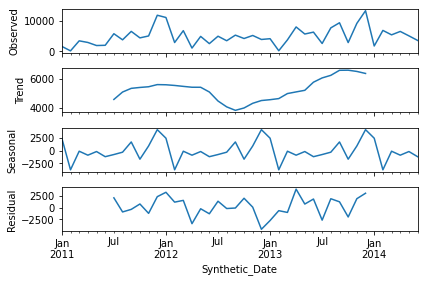

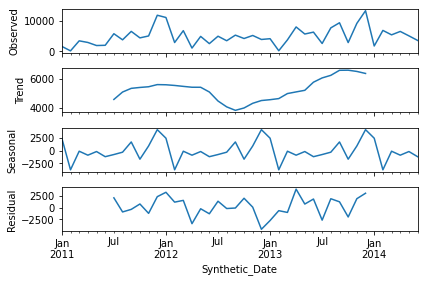

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = s
result = seasonal_decompose(series, model='additive')
result.plot()


In [121]:
df_first

,Monthly_Quantity
Synthetic_Date,
2011-01-01,1674.2030
2011-02-01,202.8880
2011-03-01,3496.5940
2011-04-01,2965.6380
2011-05-01,1955.6020
2011-06-01,2032.8220
2011-07-01,5836.9660
2011-08-01,3830.8080
2011-09-01,6603.5670


In [122]:
df_first['2013']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Monthly_Quantity
Synthetic_Date,
2013-01-01,4199.6300
2013-02-01,243.5480
2013-03-01,3813.1820
2013-04-01,8063.8470
2013-05-01,5738.4710
2013-06-01,6359.0470
2013-07-01,2624.8220
2013-08-01,7763.1480
2013-09-01,9438.6185


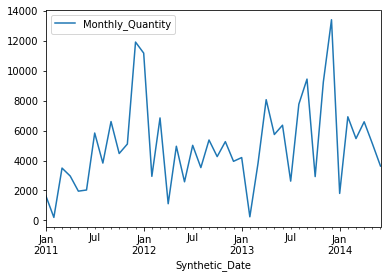

In [123]:
df_first.plot()
# We see we dont have much data to look into seasoanlity

In [124]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_first['Monthly_Quantity'])
test_result

(-5.468367670395494,
 2.429887304788359e-06,
 0,
 41,
 {'1%': -3.60098336718852,
  '10%': -2.6059629803688282,
  '5%': -2.9351348158036012},
 589.5166599193723)

In [125]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
    return


adfuller_test(df_first['Monthly_Quantity'])

ADF Test Statistic : -5.468367670395494
p-value : 2.429887304788359e-06
#Lags Used : 0
Number of Observations : 41
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [126]:
df_first

,Monthly_Quantity
Synthetic_Date,
2011-01-01,1674.2030
2011-02-01,202.8880
2011-03-01,3496.5940
2011-04-01,2965.6380
2011-05-01,1955.6020
2011-06-01,2032.8220
2011-07-01,5836.9660
2011-08-01,3830.8080
2011-09-01,6603.5670


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D2.Monthly_Quantity   No. Observations:                   40
Model:                  ARIMA(3, 2, 0)   Log Likelihood                -387.538
Method:                        css-mle   S.D. of innovations           3815.046
Date:                 Sun, 01 May 2022   AIC                            785.076
Time:                         16:22:23   BIC                            793.520
Sample:                     03-01-2011   HQIC                           788.129
                          - 06-01-2014                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -32.7027    173.274     -0.189      0.851    -372.313     306.907
ar.L1.D2.Monthly_Quantity    -1.2212      0.142     -8.629      0.000      -1.

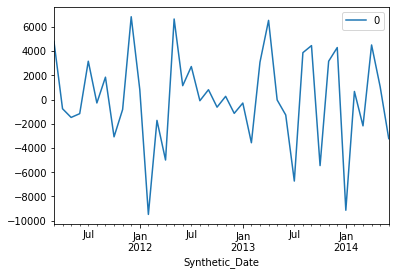

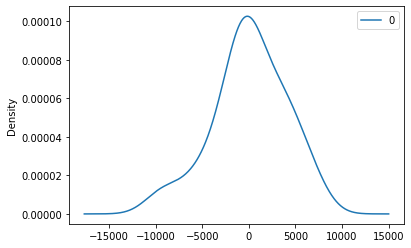

                 0
count    40.000000
mean     79.772495
std    3914.872553
min   -9491.428817
25%   -1538.579956
50%     -63.883435
75%    3109.524247
max    6844.114313


In [127]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot
# fit model
model = ARIMA(df_first, order=(3,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

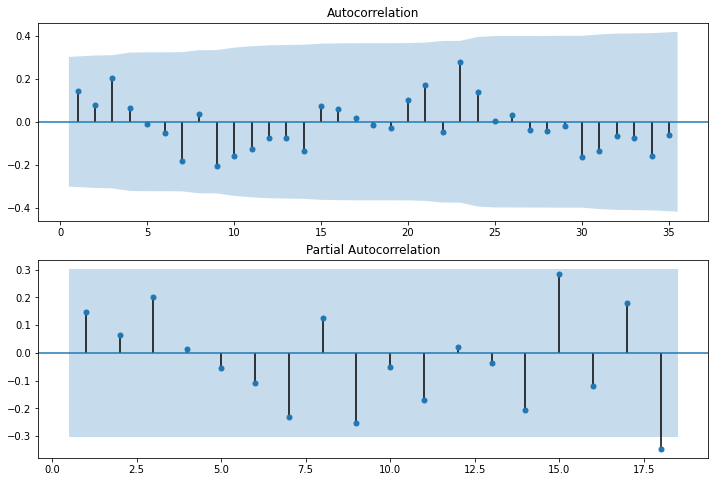

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first['Monthly_Quantity'], lags=35, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first['Monthly_Quantity'], lags=18, zero=False, ax=ax2)

In [129]:
#There is no correlation as seen above neither between lags- but we can see some seasonality/pattern

In [130]:
#There is some seasonality 

from statsmodels.tsa.statespace.sarimax import SARIMAX



In [131]:
# Create a SARIMAX model
model = SARIMAX(df_first['Monthly_Quantity'], order=(2, 1, 0), seasonal_order=(1, 1, 0, 7))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                  Monthly_Quantity   No. Observations:                   42
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 7)   Log Likelihood                -332.171
Date:                           Sun, 01 May 2022   AIC                            672.341
Time:                                   16:22:25   BIC                            678.447
Sample:                               01-01-2011   HQIC                           674.423
                                    - 06-01-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7198      0.255     -2.823      0.005      -1.219      -0.220
ar.L2         -0.3780      0.181     -2.094      0.036      -0.732      -0.024
ar.S.L7       -0.4909      0.223     -2.199      0.028      -0.928      -0.053
sigma2      2.245e+07   2.49e-09      9e+15      0.000    2.24e+07    2.24e+07
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.86
Prob(Q):                               nan   Prob(JB):                         0.65
Heteroskedasticity (H):               0.85   Skew:                            -0.18
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.6e+32. Standard errors may be unstable.
"""

In [132]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 34.3 MB/s 
     |████████████████████████████████| 9.8 MB 23.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [133]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,max_p=3,max_d=3,max_q=3,
                              test="adf",start_P=0,D=1,start_Q=0,max_P=3,max_D=3,max_Q=3,m=12,
                              trace=True,seasonal=True,stepwise=True,suppress_warnings=True)
    return autoarima_model

In [134]:
import pmdarima as pmd

def arimamodel2(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,max_p=3,max_d=2,max_q=3,
                              test="adf",start_P=0,D=2,start_Q=0,max_P=3,max_D=2,max_Q=3,m=4,
                              trace=True,seasonal=True,stepwise=True,suppress_warnings=True)
    return autoarima_model

In [135]:
arimamodel(df_first)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=591.823, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=569.514, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=573.839, Time=0.02 sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,2,1)(0,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(1,2,0)(2,1,0)[12]             : AIC=571.172, Time=0.31 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=590.385, Time=0.15 sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,2,0)(1,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(2,2,0)(1,1,0)[12]             : AIC=559.494, Time=0.11 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=563.660, Time=0.03 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=560.754, Time=0.32 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=nan sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,2,0)(1,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(3,2,0)(1,1,0)[12]             : AIC=558.040, Time=0.21 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=564.090, Time=0.05 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=559.242, Time=0.56 sec
 ARIMA(3,2,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(3,2,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(3,2,0)(2,1,1)[12]             : AIC=inf, Time=nan sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,2,0)(1,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(3,2,1)(1,1,0)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(2,2,1)(1,1,0)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(3,2,0)(1,1,0)[12] intercept   : AIC=560.057, Time=0.23 sec

Best model:  ARIMA(3,2,0)(1,1,0)[12]          
Total fit time: 3.577 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [136]:
arimamodel(df_third)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2967.189, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2971.459, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2914.249, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2969.741, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2965.971, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2902.195, Time=2.10 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=2897.397, Time=4.78 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=2899.744, Time=12.84 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2896.893, Time=9.27 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.44 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=8.51 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(1,0,0)(3,1,2)[12] intercept   : AIC=inf, Time=10.85 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True)

In [137]:
results_furniture=arimamodel2(df_first)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,2,0)[4]             : AIC=707.248, Time=0.05 sec
 ARIMA(0,0,0)(0,2,0)[4]             : AIC=703.456, Time=0.01 sec
 ARIMA(1,0,0)(1,2,0)[4]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,2,1)[4]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(1,2,0)[4]             : AIC=677.836, Time=0.02 sec
 ARIMA(0,0,0)(2,2,0)[4]             : AIC=676.102, Time=0.04 sec
 ARIMA(0,0,0)(3,2,0)[4]             : AIC=675.548, Time=0.10 sec
 ARIMA(0,0,0)(3,2,1)[4]             : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(2,2,1)[4]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(3,2,0)[4]             : AIC=672.912, Time=0.83 sec
 ARIMA(1,0,0)(2,2,0)[4]             : AIC=673.790, Time=0.58 sec
 ARIMA(1,0,0)(3,2,1)[4]             : AIC=inf, Time=0.75 sec
 ARIMA(1,0,0)(2,2,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(3,2,0)[4]             : AIC=674.711, Time=0.77 sec
 ARIMA(1,0,1)(3,2,0)[4]             : AIC=inf, Time=0.71 sec
 ARIMA(0,0

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,0,1)(3,2,0)[4]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 483, in fit
    # Initialization (this is done here rather than in the constructor
  File "/usr/local/lib/python3.7/dist-pack

 ARIMA(2,0,1)(3,2,0)[4]             : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(3,2,0)[4] intercept   : AIC=674.678, Time=0.77 sec

Best model:  ARIMA(1,0,0)(3,2,0)[4]          
Total fit time: 7.232 seconds


In [138]:
results_tech=arimamodel2(df_second)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,2,0)[4]             : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,2,0)[4]             : AIC=3361.093, Time=0.01 sec
 ARIMA(1,0,0)(1,2,0)[4]             : AIC=3282.350, Time=0.09 sec
 ARIMA(0,0,1)(0,2,1)[4]             : AIC=inf, Time=0.35 sec
 ARIMA(1,0,0)(0,2,0)[4]             : AIC=3362.668, Time=0.03 sec
 ARIMA(1,0,0)(2,2,0)[4]             : AIC=3270.226, Time=0.13 sec
 ARIMA(1,0,0)(3,2,0)[4]             : AIC=inf, Time=1.00 sec
 ARIMA(1,0,0)(2,2,1)[4]             : AIC=inf, Time=0.79 sec
 ARIMA(1,0,0)(1,2,1)[4]             : AIC=inf, Time=0.77 sec
 ARIMA(1,0,0)(3,2,1)[4]             : AIC=inf, Time=2.65 sec
 ARIMA(0,0,0)(2,2,0)[4]             : AIC=3215.448, Time=0.15 sec
 ARIMA(0,0,0)(1,2,0)[4]             : AIC=3248.298, Time=0.09 sec
 ARIMA(0,0,0)(3,2,0)[4]             : AIC=3161.315, Time=0.24 sec
 ARIMA(0,0,0)(3,2,1)[4]             : AIC=inf, Time=1.60 sec
 ARIMA(0,0,0)(2,2,1)[4]             : AIC=inf, Time=0.75 sec
 ARIMA(

In [139]:
results_officesup=arimamodel2(df_third)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,2,0)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,2,0)[4]             : AIC=3201.249, Time=0.02 sec
 ARIMA(1,0,0)(1,2,0)[4]             : AIC=3144.586, Time=0.24 sec
 ARIMA(0,0,1)(0,2,1)[4]             : AIC=inf, Time=0.99 sec
 ARIMA(1,0,0)(0,2,0)[4]             : AIC=3202.852, Time=0.06 sec
 ARIMA(1,0,0)(2,2,0)[4]             : AIC=3088.745, Time=1.10 sec
 ARIMA(1,0,0)(3,2,0)[4]             : AIC=3064.551, Time=1.33 sec
 ARIMA(1,0,0)(3,2,1)[4]             : AIC=inf, Time=2.27 sec
 ARIMA(1,0,0)(2,2,1)[4]             : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(3,2,0)[4]             : AIC=3065.620, Time=0.34 sec
 ARIMA(2,0,0)(3,2,0)[4]             : AIC=3066.541, Time=3.08 sec
 ARIMA(1,0,1)(3,2,0)[4]             : AIC=inf, Time=3.00 sec
 ARIMA(0,0,1)(3,2,0)[4]             : AIC=3064.416, Time=1.04 sec
 ARIMA(0,0,1)(2,2,0)[4]             : AIC=3088.597, Time=0.62 sec
 ARIMA(0,0,1)(3,2,1)[4]             : AIC=inf, Time=2.91 s

In [140]:
#results_4p.order

In [141]:
results_furniture=arimamodel(s)#Model _Selectio with Season repeating after 4 

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=591.823, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=569.514, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=573.839, Time=0.02 sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,2,1)(0,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(1,2,0)(2,1,0)[12]             : AIC=571.172, Time=0.29 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=590.385, Time=0.14 sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,2,0)(1,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(2,2,0)(1,1,0)[12]             : AIC=559.494, Time=0.11 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=563.660, Time=0.03 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=560.754, Time=0.33 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=nan sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,2,0)(1,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(3,2,0)(1,1,0)[12]             : AIC=558.040, Time=0.19 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=564.090, Time=0.04 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=559.242, Time=0.55 sec
 ARIMA(3,2,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(3,2,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(3,2,0)(2,1,1)[12]             : AIC=inf, Time=nan sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,2,0)(1,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 446, in fit
    @loglikelihood_burn.setter
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax

 ARIMA(3,2,1)(1,1,0)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(2,2,1)(1,1,0)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(3,2,0)(1,1,0)[12] intercept   : AIC=560.057, Time=0.21 sec

Best model:  ARIMA(3,2,0)(1,1,0)[12]          
Total fit time: 3.440 seconds


In [142]:
result_tech2=arimamodel(df_second)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=3108.267, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3106.248, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3066.371, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3104.910, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3107.511, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3047.545, Time=2.20 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=3059.166, Time=1.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=3040.772, Time=5.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3035.624, Time=2.10 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=7.38 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=3053.443, Time=0.92 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=3056.056, Time=1.10 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept

In [143]:
result_tech2.order

(3, 0, 1)

In [144]:
p_tech=result_tech2.order
q_tech=result_tech2.seasonal_order

In [145]:
print(p_tech,q_tech)

(3, 0, 1) (1, 1, 1, 12)


In [146]:
p1=results_furniture.order
q1=results_furniture.seasonal_order

In [147]:
print(p1,q1)

(3, 2, 0) (1, 1, 0, 12)


In [148]:
p_office=results_officesup.order
q_office=result_tech2.seasonal_order

In [149]:
print(p_office)

(0, 0, 1)


In [150]:
second_best_tech=[3,0,2]
second_best_off=[1,0,2]
second_best_furn=[2,0,1]

In [151]:
model_storage={"Furniture":[second_best_furn],"office":[second_best_off],"Technology":[second_best_tech]}

In [152]:
model_storage["Furniture"][0]

[2, 0, 1]

In [153]:
#Functions to call Furniture 
def recall(Product):
  r=model_storage[Product]
  return r[0]

In [154]:
recall("Furniture")

[2, 0, 1]

In [155]:
print(p1,"Furniture Best Mode SARIMAX")
print(q1,"Furniture Best Model SARIMAX")

(3, 2, 0) Furniture Best Mode SARIMAX
(1, 1, 0, 12) Furniture Best Model SARIMAX


In [156]:
best_model = SARIMAX(df_first, order=p1, seasonal_order=q1).fit()
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   Monthly_Quantity   No. Observations:                   42
Model:             SARIMAX(3, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -274.020
Date:                            Sun, 01 May 2022   AIC                            558.040
Time:                                    16:27:22   BIC                            564.701
Sample:                                01-01-2011   HQIC                           560.076
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3336      0.277     -4.809      0.000      -1.877      -0.790
ar.L2         -0.8980      0.310   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [157]:
#Auto-Arima Wokring 

In [158]:
autoModel = pmd.auto_arima(df_first, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=803.582, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=849.236, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=812.043, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=831.532, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=802.117, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=827.007, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=799.635, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=801.740, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=806.529, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=797.033, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=795.506, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=794.002, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=795.112, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.398 seconds


In [159]:

order = autoModel.order
yhat = list()
model = ARIMA(df_first, order=order)
model_fit = model.fit()
predictions = model_fit.forecast(steps=7)
yhat = yhat + [predictions]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [160]:
predictions[0]

array([5010.88065476, 5010.88065476, 5010.88065476, 5010.88065476,
       5010.88065476, 5010.88065476, 5010.88065476])

In [161]:
autoModel.order

(0, 0, 0)

In [162]:
weekly_result=arimamodel(x_week)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2154.890, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2158.147, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2102.768, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2067.273, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2156.149, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2158.192, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2068.404, Time=1.84 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2068.468, Time=4.57 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2102.343, Time=0.46 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=6.47 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2066.688, Time=0.52 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=2067.793, Time=1.16 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=2067.835, Time=3.44 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2103.130, Time=0.47 sec
 ARIMA(0,0,0)(1,1,2)[12]

In [163]:
x_week

Order Date
2011-01-09    112.124963
2011-01-16    139.525615
2011-01-23     51.239882
2011-01-30     75.593111
2011-02-06     74.928923
                 ...    
2014-06-01     98.133120
2014-06-08    137.439680
2014-06-15     65.773500
2014-06-22     59.033909
2014-06-29     71.478385
Freq: W-SUN, Name: Sales, Length: 182, dtype: float64

In [164]:
#results2.summary()

Validation Data Set Preperation for 3 products in US -west

In [165]:
valid_west=valid_data[(valid_data['Region']=='West') & (valid_data['Category']=='Furniture')]
valid_west['Synthetic_Date'] = pd.to_datetime(valid_west[['Year', 'Month']].assign(DAY=1))
valid_west.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(7, 8)

In [166]:
valid_Technology=valid_data[(valid_data['Region']=='West') & (valid_data['Category']=='Technology')]
valid_Technology['Synthetic_Date'] = pd.to_datetime(valid_Technology[['Year', 'Month']].assign(DAY=1))
valid_Technology.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(7, 8)

In [167]:
valid_Office_Supplies=valid_data[(valid_data['Region']=='West') & (valid_data['Category']=='Office Supplies')]
valid_Office_Supplies['Synthetic_Date'] = pd.to_datetime(valid_Office_Supplies[['Year', 'Month']].assign(DAY=1))
valid_Office_Supplies.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(7, 8)

In [168]:
df_valid_office_supply=valid_Office_Supplies.iloc[:,6:8]
df_valid_office_supply

,Monthly_Quantity,Synthetic_Date
1414,2837.530,2014-06-01
1415,1980.716,2014-07-01
1416,14540.831,2014-08-01
1417,9050.398,2014-09-01
1418,9744.214,2014-10-01
1419,5254.732,2014-11-01
1420,8248.296,2014-12-01


In [169]:
df_valid_technology=valid_Technology.iloc[:,6:8]

In [170]:
df_valid_furniture=valid_west.iloc[:,6:8]

df_valid

In [171]:
history=[x for x in s]
history2=[x for x in s2_tech]
history3=[x for x in s3_office]

In [172]:
train=df_first.values
#train


In [173]:
df_valid_furniture.index=df_valid_furniture['Synthetic_Date']
del (df_valid_furniture['Synthetic_Date'])

In [174]:
df_valid_furniture

,Monthly_Quantity
Synthetic_Date,
2014-06-01,997.700
2014-07-01,6156.531
2014-08-01,4596.342
2014-09-01,9531.501
2014-10-01,5954.845
2014-11-01,8363.685
2014-12-01,6555.152


In [175]:
df_valid_technology.index=df_valid_technology['Synthetic_Date']

In [176]:
df_valid_technology
del(df_valid_technology['Synthetic_Date'])

In [177]:
df_valid_technology

,Monthly_Quantity
Synthetic_Date,
2014-06-01,1781.688
2014-07-01,8642.774
2014-08-01,9863.794
2014-09-01,8360.186
2014-10-01,3902.233
2014-11-01,6543.322
2014-12-01,6638.814


In [178]:
df_valid_office_supply.index=df_valid_office_supply['Synthetic_Date']
del df_valid_office_supply['Synthetic_Date']

In [179]:
valid_furniture=df_valid_furniture.values

In [180]:
df_valid_office_supply

,Monthly_Quantity
Synthetic_Date,
2014-06-01,2837.530
2014-07-01,1980.716
2014-08-01,14540.831
2014-09-01,9050.398
2014-10-01,9744.214
2014-11-01,5254.732
2014-12-01,8248.296


In [181]:
valid_furniture=valid_furniture.reshape(-1,)

In [182]:
valid_furniture

array([ 997.7  , 6156.531, 4596.342, 9531.501, 5954.845, 8363.685,
       6555.152])

In [183]:
df_valid_furniture.index

DatetimeIndex(['2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Synthetic_Date', freq=None)

In [184]:
df_valid_furniture

,Monthly_Quantity
Synthetic_Date,
2014-06-01,997.700
2014-07-01,6156.531
2014-08-01,4596.342
2014-09-01,9531.501
2014-10-01,5954.845
2014-11-01,8363.685
2014-12-01,6555.152


In [185]:
df_valid2=df_valid_furniture.values.reshape(-1,)

In [186]:
df_valid2

array([ 997.7  , 6156.531, 4596.342, 9531.501, 5954.845, 8363.685,
       6555.152])

In [187]:
history

[1674.203,
 202.888,
 3496.594,
 2965.638,
 1955.602,
 2032.822,
 5836.966,
 3830.808,
 6603.567,
 4470.3,
 5102.0585,
 11911.0015,
 11172.698,
 2944.6569999999997,
 6845.691,
 1115.496,
 4954.8785,
 2580.674,
 5015.911,
 3529.011,
 5371.75,
 4263.827,
 5262.546,
 3947.804,
 4199.63,
 243.548,
 3813.182,
 8063.847,
 5738.4710000000005,
 6359.0470000000005,
 2624.822,
 7763.148,
 9438.6185,
 2928.643,
 9244.87,
 13401.814,
 1804.413,
 6922.5419999999995,
 5467.3,
 6588.428,
 5135.372,
 3631.9005]

In [188]:
run_type=['model1','model2','model3','model4']
def running(run_type):
  predictions=list()
  if run_type=='model1' :
   for t in range(len(df_valid2)):#Walk through the Array of Future Values 
    model=ARIMA(history,order=(0,1,1))#Training through History object 
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0][0]
    predictions.append(yhat)
    obs=valid_furniture[t]
    history.append(obs)
  elif run_type=='model2':
   model=ARIMA(df_first,order=(1,0,0))#training Data
   model_fit=model.fit()
   output=model_fit.forecast(steps=7)
   predictions=output[0]
  elif run_type=='model3':
    model=SARIMAX(df_first,order=p1,seasonal_order=q1).fit()
    output=model.get_forecast(steps=7,dynamic=True)
    predictions=output.predicted_mean
  return predictions

In [189]:
model=ARIMA(df_first,order=(1,0,0))
model_fit=model.fit()
output=model_fit.forecast(steps=7)[0]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [190]:
preditions3=running('model3')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [191]:
df_valid2
history

[1674.203,
 202.888,
 3496.594,
 2965.638,
 1955.602,
 2032.822,
 5836.966,
 3830.808,
 6603.567,
 4470.3,
 5102.0585,
 11911.0015,
 11172.698,
 2944.6569999999997,
 6845.691,
 1115.496,
 4954.8785,
 2580.674,
 5015.911,
 3529.011,
 5371.75,
 4263.827,
 5262.546,
 3947.804,
 4199.63,
 243.548,
 3813.182,
 8063.847,
 5738.4710000000005,
 6359.0470000000005,
 2624.822,
 7763.148,
 9438.6185,
 2928.643,
 9244.87,
 13401.814,
 1804.413,
 6922.5419999999995,
 5467.3,
 6588.428,
 5135.372,
 3631.9005]

In [192]:
predictions=list()
for t in range(len(df_valid2)):
    model=ARIMA(history,order=(0,1,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0][0]
    print(yhat)
    predictions.append(yhat)
    obs=df_valid2[t]
    history.append(obs)

6599.1683348523975
4832.951608269289
6144.237971505594
6093.524246411805
6341.273391172603
6440.635152065418
6611.992372455107


In [193]:
predictions


[6599.1683348523975,
 4832.951608269289,
 6144.237971505594,
 6093.524246411805,
 6341.273391172603,
 6440.635152065418,
 6611.992372455107]

In [194]:
model=SARIMAX(df_first,order=p1,seasonal_order=q1).fit()
output=model.get_forecast(steps=7,dynamic=True)
predictions=output.predicted_mean

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [195]:
history_tech=[x for x in s2_tech]
history_off=[x for x in s3_office ]


In [196]:
history[0]

1674.203

VALIDATION TESTING  FOR FURNITURE

In [197]:
# run_type=['model1','model2','model3','model4']
# def validation_test(run_type,product_valid,history,X_TR,product_type) :
#   predictions=list()
#   train=X_TR.values
#   product_valid=product_valid
#   if product_type=='Furniture':
#     train=X_TR.values
#     print(len(product_valid))
#     if run_type=='model1' :
#      for t in range(len(product_valid)):
#         model=ARIMA(history,order=(1,1,0))
#         model_fit=model.fit()
#         output=model_fit.forecast()
#         yhat=output[0]
#         predictions.append(yhat)
#         obs=product_valid.values[t]
#         history.append(obs)
#     elif run_type=='model2':
#       model=SARIMAX(train,order=(1,0,0)).fit()
#       output=model.get_forecast(steps=7,dynamic=True)
#       predictions=output.predicted_mean
#     elif run_type=='model3':
#       model=SARIMAX(train,order=p1,seasonal_order=q1).fit()
#       output=model.get_forecast(steps=7,dynamic=True)
#       predictions=output.predicted_mean
#   elif product_type=='Technology':
#      if run_type=='model1' :
#       for t in range(len(product_valid)):
#         model=ARIMA(history_tech,order=(1,1,0))
#         model_fit=model.fit()
#         output=model_fit.forecast()
#         yhat=output[0]
#         predictions.append(yhat)
#         obs=product_valid[t]
#         history2.append(obs)
#      elif run_type=='model2':
#       model=SARIMAX(train,order=second_best_tech).fit()
#       output=model.get_forecast(steps=7,dynamic=True)
#       predictions=output.predicted_mean
#      elif run_type=='model3':
#       model=SARIMAX(train,order=p_tech,seasonal_order=q_tech).fit()
#       output=model.get_forecast(steps=7,dynamic=True)
#       predictions=output.predicted_mean
#   elif product_type=="Office Supplies":
#      if run_type=='model1' :
#       for t in range(len(product_valid)):
#         model=ARIMA(history3,order=(1,1,0))
#         model_fit=model.fit()
#         output=model_fit.forecast()
#         yhat=output[0]
#         predictions.append(yhat)
#         obs=product_valid[t]
#         history2.append(obs)
#      elif run_type=='model2':
#       model=SARIMAX(train,order=second_best_off).fit()
#       output=model.get_forecast(steps=7,dynamic=True)
#       predictions=output.predicted_mean
#      elif run_type=='model3':
#       model=SARIMAX(train,order=p_office,seasonal_order=q_office).fit()
#       output=model.get_forecast(steps=7,dynamic=True)
#       predictions=output.predicted_mean
#   return predictions   



In [198]:
#validation_test(run_type='model1',product_valid=df_valid_furniture,history=history,X_TR=df_first,product_type='Furniture')

In [199]:
model=ARIMA(df_first,order=(1,1,0))
model_fit=model.fit()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [200]:
#Creating models by Different Products


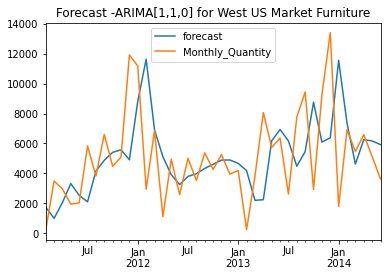

In [201]:
model_fit.plot_predict(dynamic=False)# 
plt.title("Forecast -ARIMA[1,1,0] for West US Market Furniture")
plt.show()

In [202]:
predictions

2014-07-01    2553.536201
2014-08-01    3123.251213
2014-09-01    3630.314997
2014-10-01    -236.511172
2014-11-01    1877.687112
2014-12-01    1947.568998
2015-01-01   -3516.479003
Freq: MS, dtype: float64

In [203]:
history= [x for x in s]

In [204]:

predictions_furniture_model1 =running(run_type='model1')

In [205]:
predictions_furniture_model1

[6599.1683348523975,
 4832.8219117077915,
 6144.237971505594,
 6093.524246411805,
 6341.273391172603,
 6440.635152065418,
 6611.992372455107]

In [206]:
#approach 2
predictions_furniture_model2=running(run_type='model2')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [207]:
predictions_furniture_model3=running(run_type='model3')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [208]:
# Optionally we can use SARIMAX Library which can be set as in sample and out of sample using dynamic statemetn. In In sample- the last known true value is added to the model
model33 = SARIMAX(df_first, order=(1,0,0), trend='c')
results = model33.fit()
# Make in-sample prediction
forecast = results.get_prediction(start=-12)
mean_forecast=forecast.predicted_mean
# The below represents in sample values which means we predict 1 value  and then use its true value to make next predictio 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [209]:

#plt.plot(mean_forecast.values,color='red',label='forecast')
forecast=results.get_prediction(start = len(df_first)-5,dynamic= True)

In [210]:
p=forecast.predicted_mean
p

2014-02-01    4597.371835
2014-03-01    4966.138018
2014-04-01    5014.827778
2014-05-01    5021.256493
2014-06-01    5022.105304
Freq: MS, dtype: float64

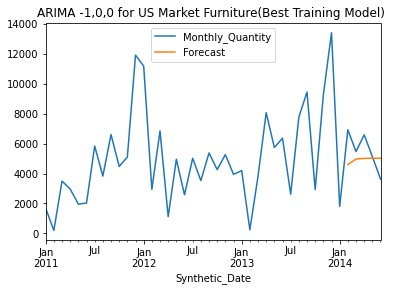

In [211]:
df_first.plot(legend = True)
p.plot(legend=True,label='Forecast')
plt.title("ARIMA -1,0,0 for US Market Furniture(Best Training Model) ")
plt.show()

Text(0.5, 1.0, 'ARIMA 110 for US West Furnuture ')

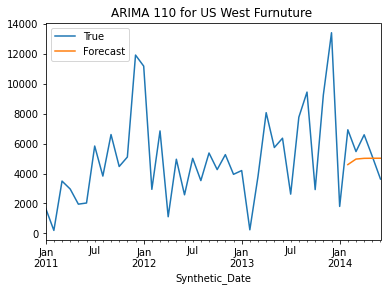

In [212]:
fig, ax = plt.subplots()
df_first.plot(legend = True,ax=ax)
p.plot(legend=True,ax=ax)
ax.legend(["True", "Forecast"]);
ax.set_title("ARIMA 110 for US West Furnuture ")

In [213]:
#results.get_predictions(start = len(df_train), end = len(df) - 1, type = 'levels').rename('SARIMA (1, 1, 2')

In [214]:
#approach 1
#predictions_walkover=running(run_type='model1')

In [215]:
#approach2
#predictions_2=running(run_type='model2')

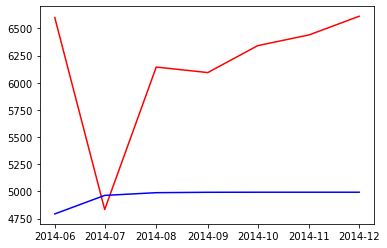

In [216]:

plt.plot(df_valid_furniture.index,predictions_furniture_model1,color='red')
plt.plot(df_valid_furniture.index,predictions_furniture_model2,color='blue')


In [217]:
y_to_train = df_first[:'2014-01-01'] # dataset to train
valid_y=df_first['2014-01-01':]
planning_pd=len(valid_y)
print(planning_pd)
model=ARIMA(y_to_train,order=(0,1,0))
model_fit=model.fit()

output=model_fit.forecast(planning_pd)

6


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [218]:
training_data.groupby

<bound method DataFrame.groupby of             Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
Order Date                                                                    
2011-01-01   42433     AG-2011-2040  2011-01-01    6/1/2011  Standard Class   
2011-01-01   22253    IN-2011-47883  2011-01-01    8/1/2011  Standard Class   
2011-01-01   48883     HU-2011-1220  2011-01-01    5/1/2011    Second Class   
2011-01-01   11731  IT-2011-3647632  2011-01-01    5/1/2011    Second Class   
2011-01-01   22255    IN-2011-47883  2011-01-01    8/1/2011  Standard Class   
...            ...              ...         ...         ...             ...   
2013-12-31   42653     TU-2013-9400  2013-12-31    4/1/2014  Standard Class   
2013-12-31   39963   CA-2013-163951  2013-12-31    3/1/2014     First Class   
2013-12-31   37057   US-2013-111528  2013-12-31  31-12-2013        Same Day   
2013-12-31   36058   CA-2013-117660  2013-12-31    5/1/2014  Standard Class   
2013-12-31   4970

In [219]:
y_to_train.head(3)

,Monthly_Quantity
Synthetic_Date,
2011-01-01,1674.203
2011-02-01,202.888
2011-03-01,3496.594


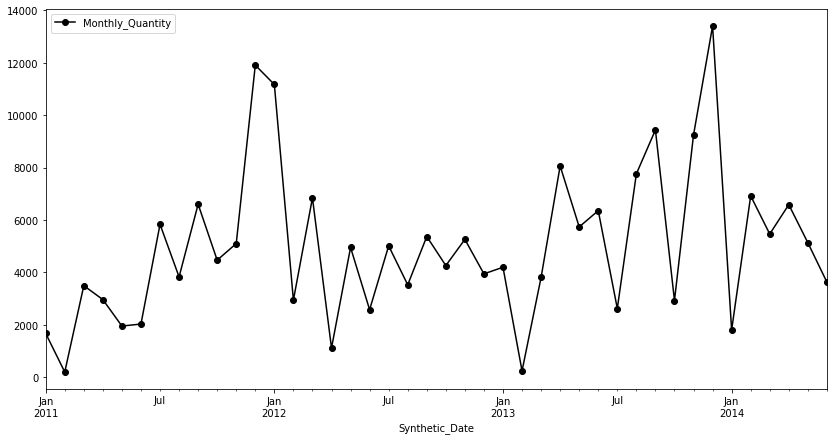

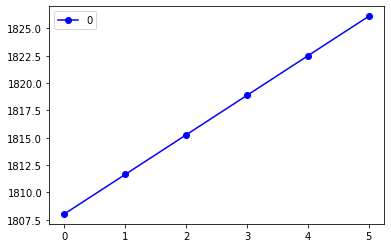

In [220]:
df_first.plot(marker='o', color='black', legend=True, figsize=(14, 7))
#model_fit.predicted_mean.plot(marker="o", color='blue')
pd.DataFrame(output[0]).plot(marker='o', color='blue', legend=True)

In [221]:
output[0]

array([1808.02994444, 1811.64688889, 1815.26383333, 1818.88077778,
       1822.49772222, 1826.11466667])

In [222]:
predictions_furniture_model3

2014-07-01    2553.536201
2014-08-01    3123.251213
2014-09-01    3630.314997
2014-10-01    -236.511172
2014-11-01    1877.687112
2014-12-01    1947.568998
2015-01-01   -3516.479003
Freq: MS, dtype: float64

In [223]:
def rmse(yhat,y_actual):
     p=np.subtract(y_actual,yhat)
     magn=np.linalg.norm(p)#L2 NORM OF VECOT 
     q=magn
     mse2=q/len(y_actual)
     return mse2

def MAPE(Y_Predicted,Y_actual):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [224]:
DF=pd.DataFrame(predictions_furniture_model1)
yhat_vector=DF.values.reshape(-1,)

In [225]:
valid_furniture

array([ 997.7  , 6156.531, 4596.342, 9531.501, 5954.845, 8363.685,
       6555.152])

In [226]:
# def single_array(valid):
#   valid_new=[]
#   for i in range(len(predictions_2)):#same lenght as predictions 
#     valid_new.append(valid[i][0])
#   return valid_new

def test_evaluation(predictions,valid):
   df=pd.DataFrame(predictions)
   yhat=df.values.reshape(-1,)
   mape=MAPE(yhat,valid)
   return mape

In [227]:
valid_furniture

array([ 997.7  , 6156.531, 4596.342, 9531.501, 5954.845, 8363.685,
       6555.152])

In [228]:
mape_furniture_model1=test_evaluation(predictions_furniture_model1,valid_furniture)# Both must be arrays 

In [229]:
mape_furniture_model2=test_evaluation(predictions_furniture_model2,valid_furniture)

In [230]:
mape_furniture_model3=test_evaluation(predictions_furniture_model3,valid_furniture)

In [231]:
mape_furniture_model3
list_m=[mape_furniture_model1,mape_furniture_model2,mape_furniture_model3]
x=['model-110 ARIMA ','model: 100 ARIMA','model:3,2,0 SARIMAX']

Text(0.5, 1.0, 'ARIMA model_comparison -Validation_Set')

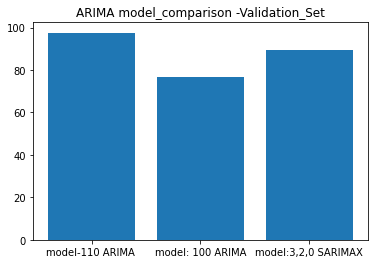

In [232]:
plt.bar(x,list_m)
plt.title('ARIMA model_comparison -Validation_Set')

Model 110 will be the best mode for Furniture across the globe/regions 

In [233]:
second_best_tech

[3, 0, 2]

In [234]:
run_type=['model1','model2','model3','model4']
def validation_test(run_type,product_valid,history,X_TR,product_type) :
  predictions=list()
  train=X_TR.values#array
  product_valid=product_valid.values#array
  if product_type=='Furniture':
    train=X_TR.values
    print(len(product_valid))
    if run_type=='model1' :
     for t in range(len(product_valid)):
        model=ARIMA(history,order=(1,1,0))#common
        model_fit=model.fit()
        output=model_fit.forecast()
        yhat=output[0][0]
        predictions.append(yhat)
        obs=product_valid[t]
        history.append(obs)
    elif run_type=='model2':
      model=SARIMAX(train,order=(1,0,0)).fit()
      output=model.get_forecast(steps=7,dynamic=True)
      predictions=output.predicted_mean
    elif run_type=='model3':
      model=SARIMAX(train,order=p1,seasonal_order=q1).fit()
      output=model.get_forecast(steps=7,dynamic=True)
      predictions=output.predicted_mean
  elif product_type=='Technology':
     if run_type=='model1' :
      for t in range(len(product_valid)):
        model=ARIMA(history_tech,order=(1,1,0))
        model_fit=model.fit()
        output=model_fit.forecast()
        yhat=output[0][0]
        predictions.append(yhat)
        obs=product_valid[t]
        history2.append(obs)
     elif run_type=='model2':
      model=SARIMAX(train,order=second_best_tech).fit()
      output=model.get_forecast(steps=7,dynamic=True)
      predictions=output.predicted_mean
     elif run_type=='model3':
      model=SARIMAX(train,order=p_tech,seasonal_order=q_tech).fit()
      output=model.get_forecast(steps=7,dynamic=True)
      predictions=output.predicted_mean
  elif product_type=="Office Supplies":
     if run_type=='model1' :
      for t in range(len(product_valid)):
        model=ARIMA(history3,order=(1,1,0))
        model_fit=model.fit()
        output=model_fit.forecast()
        yhat=output[0][0]
        predictions.append(yhat)
        obs=product_valid[t]
        history2.append(obs)
     elif run_type=='model2':
      model=SARIMAX(train,order=second_best_off).fit()
      output=model.get_forecast(steps=7,dynamic=True)
      predictions=output.predicted_mean
     elif run_type=='model3':
      model=SARIMAX(train,order=p_office,seasonal_order=q_office).fit()
      output=model.get_forecast(steps=7,dynamic=True)
      predictions=output.predicted_mean
  return predictions   



In [235]:
yhat_model1_furniture=validation_test(run_type='model1',product_valid=df_valid_furniture,history=history,X_TR=df_first,product_type='Furniture')

7


/usr/local/lib/python3.7/dist-packages/statsmodels/base/data.py:629: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  exog_names = ['x%d' % i for i in range(1, exog.shape[1])]
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:424: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [236]:
#yhat_model3_furniture

In [237]:
#test_evaluation(yhat_model3_furniture,df_valid_furniture.values)

In [238]:
yhat_model2_furniture=validation_test(run_type='model2',product_valid=df_valid_furniture,history=history,X_TR=df_first,product_type='Furniture')

7


In [239]:
yhat_model3_furniture=validation_test(run_type='model3',product_valid=df_valid_furniture,history=history,X_TR=df_first,product_type='Furniture')

7


In [240]:
yhat_model1_tech=validation_test(run_type='model1',product_valid=df_valid_technology,history=history2,X_TR=df_second,product_type='Technology')
yhat_model2_tech=validation_test(run_type='model2',product_valid=df_valid_technology,history=history2,X_TR=df_second,product_type='Technology')

In [241]:
yhat_model1_office=validation_test(run_type='model1',product_valid=df_valid_office_supply,history=history3,X_TR=df_third,product_type='Office Supplies')
yhat_model2_office=validation_test(run_type='model2',product_valid=df_valid_office_supply,history=history3,X_TR=df_third,product_type='Office Supplies')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  params_exog = []


In [242]:
yhat_model3_office=validation_test(run_type='model3',product_valid=df_valid_office_supply,history=history3,X_TR=df_third,product_type='Office Supplies')

In [243]:
df_valid_technology

,Monthly_Quantity
Synthetic_Date,
2014-06-01,1781.688
2014-07-01,8642.774
2014-08-01,9863.794
2014-09-01,8360.186
2014-10-01,3902.233
2014-11-01,6543.322
2014-12-01,6638.814


In [244]:
yhat_mode3_tech=validation_test(run_type='model3',product_valid=df_valid_technology,history=history2,X_TR=df_second,product_type='Technology')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


In [245]:
df_valid_technology

,Monthly_Quantity
Synthetic_Date,
2014-06-01,1781.688
2014-07-01,8642.774
2014-08-01,9863.794
2014-09-01,8360.186
2014-10-01,3902.233
2014-11-01,6543.322
2014-12-01,6638.814


In [246]:
mape_office1=test_evaluation(yhat_model1_office,df_valid_office_supply.values)
mape_office2=test_evaluation(yhat_model2_office,df_valid_office_supply.values)
mape_office3=test_evaluation(yhat_model3_office,df_valid_office_supply.values)

In [247]:
mape_tech_1=test_evaluation(yhat_model1_tech,df_valid_technology.values)
mape_tech_2=test_evaluation(yhat_model2_tech,df_valid_technology.values)

Text(0.5, 1.0, 'MAPE Score  -Validation_Set_Tech Products ')

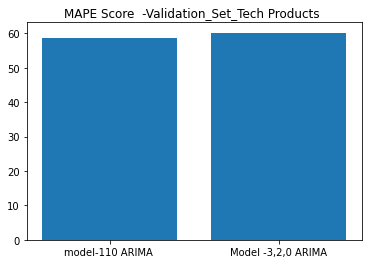

In [248]:
list_m=[mape_tech_1,mape_tech_2]
x=['model-110 ARIMA ','Model -3,2,0 ARIMA']
plt.bar(x,list_m)
plt.title('MAPE Score  -Validation_Set_Tech Products ')

In [249]:
results_officesup

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(3, 2, 0, 4),
      suppress_warnings=True, with_intercept=False)

Text(0.5, 1.0, 'MAPE Score  -Validation_Set_Office Products ')

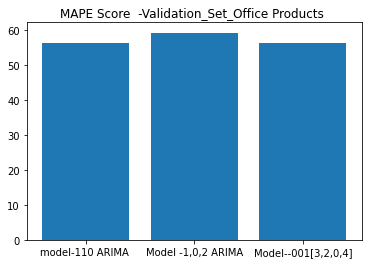

In [250]:
list_m=[mape_office1,mape_office2,mape_office3]
x=['model-110 ARIMA ','Model -1,0,2 ARIMA','Model--001[3,2,0,4]']
plt.bar(x,list_m)
plt.title('MAPE Score  -Validation_Set_Office Products ')

Office Supply Validation Data Set 

In [251]:
# We are trying  001 models on 

In [252]:
# model_pipeline=['model1','model2','model3']
# def test_complete(model_type,valid2):
#    predictions=running(run_type=model_type)
#    mape=test_evaluation(predictions,valid2)
#    return mape
# x=defaultdict()
# for model in model_pipeline:
#     mape_model=test_complete(model,valid_furniture)
#     x[model]=mape_model

In [253]:
x

['model-110 ARIMA ', 'Model -1,0,2 ARIMA', 'Model--001[3,2,0,4]']

In [254]:
# valid_new3

In [255]:
#r=rmse(yhat_vector,valid)

#q=MAPE(,valid_new3)
#print("rMSE error is : %3d, MAPE erros is  : %2d for 5 step process " % (r,q))


In [256]:
x_daily=cohort_1.resample('D').mean()

In [257]:
daily=x_daily['Sales']

In [258]:
daily_interp=daily.interpolate(limit=2, limit_direction="forward")

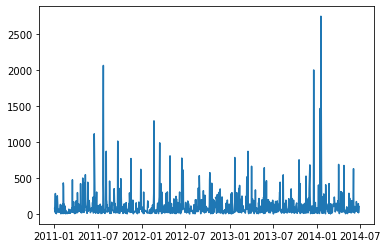

In [259]:
plt.plot(daily_interp)

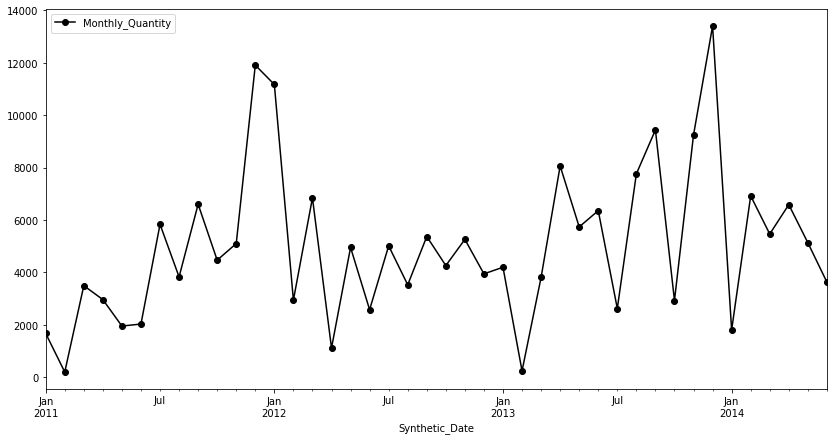

In [260]:
df_first.plot(marker='o', color='black', legend=True, figsize=(14, 7))



In [261]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean

SimpleImputer()

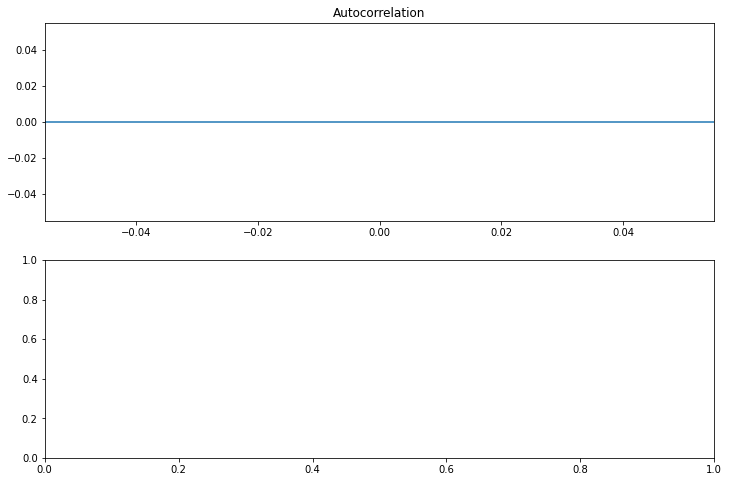

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_interp, lags=200, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)

In [263]:
Market_List

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [264]:
from collections import defaultdict
cohort={}
series_size=defaultdict()
for i in range(len(Market_List)):
      cohort[i]=training_data2[(training_data2['Market']==Market_List[i]) & (training_data2['Category']=='Office Supplies')]
      p=len(cohort[i])
      c=Market_List[i]
      series_size[c]=(p)

In [265]:
series_size

defaultdict(None,
            {'APAC': 4951,
             'Africa': 2458,
             'Canada': 218,
             'EMEA': 2626,
             'EU': 5201,
             'LATAM': 4731,
             'US': 4888})

In [266]:
series_size['APAC']

4951

In [267]:
cohort

{0:             Row ID      Order ID  Ship Date       Ship Mode Customer ID  \
 Order Date                                                                
 2011-01-01   42433  AG-2011-2040   6/1/2011  Standard Class    TB-11280   
 2011-01-02   44508  AO-2011-1390   4/2/2011    Second Class     DK-3150   
 2011-01-03   50129   NI-2011-190   6/3/2011  Standard Class     EH-3765   
 2011-01-06   44800  SO-2011-3360   4/6/2011    Second Class      AJ-945   
 2011-01-06   44799  SO-2011-3360   4/6/2011    Second Class      AJ-945   
 ...            ...           ...        ...             ...         ...   
 2013-10-31   45831  NI-2013-3460  5/11/2013    Second Class     MV-8190   
 2011-12-31   41681  CG-2011-8620   2/1/2012    Second Class     NB-8655   
 2013-12-31   47215  AO-2013-6910   3/1/2014     First Class     JH-5985   
 2013-12-31   48725   SF-2013-680   6/1/2014  Standard Class     NS-8505   
 2013-12-31   48724   SF-2013-680   6/1/2014  Standard Class     NS-8505   
 
       

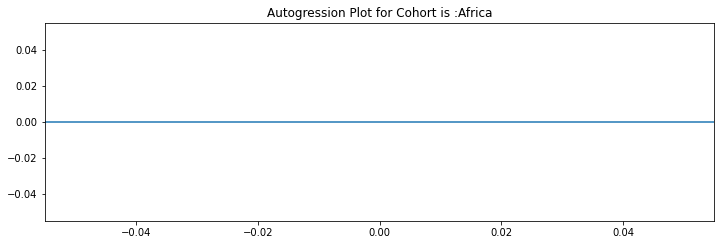

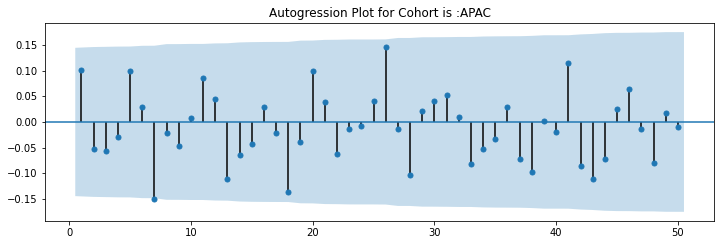

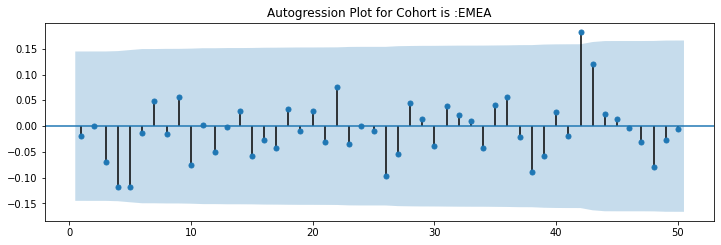

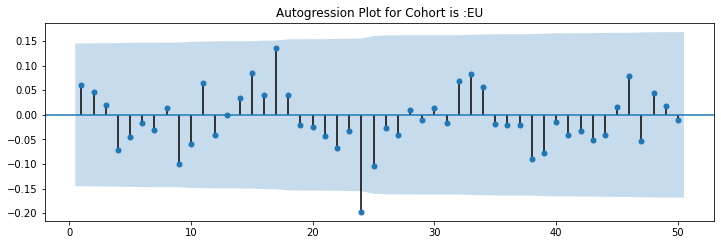

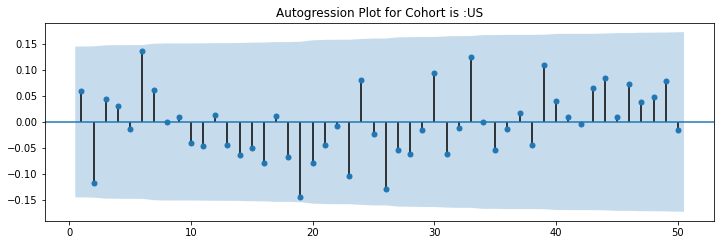

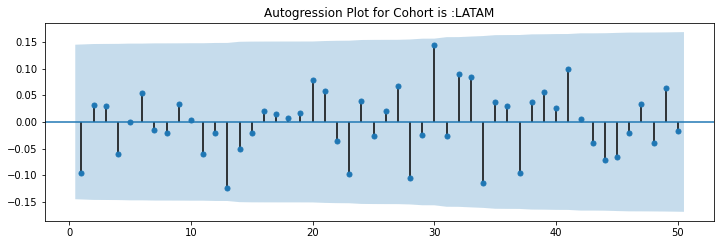

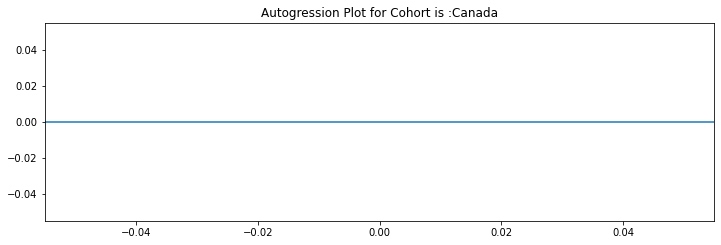

In [268]:
for index in cohort:
     weekly_cohort=cohort[index].resample('W').mean()
     x_week=weekly_cohort['Sales']
     fig= plt.figure(figsize=(12,8))
     ax = fig.add_subplot(211)
     fig = sm.graphics.tsa.plot_acf(x_week, lags=50, zero=False, ax=ax)
     plt.title('Autogression Plot for Cohort is :'+ str(Market_List[index]))


In [269]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean

SimpleImputer()

Order Date
2011-01-31     78.745655
2011-02-28    134.532667
2011-03-31     71.738559
Freq: M, Name: Sales, dtype: float64
Order Date
2011-01-31    129.019468
2011-02-28    134.379756
2011-03-31    139.126526
Freq: M, Name: Sales, dtype: float64
Order Date
2011-01-31    125.141094
2011-02-28     64.985520
2011-03-31     95.011692
Freq: M, Name: Sales, dtype: float64
Order Date
2011-01-31    141.402711
2011-02-28    157.365808
2011-03-31    177.165120
Freq: M, Name: Sales, dtype: float64
Order Date
2011-01-31    104.283407
2011-02-28     99.506333
2011-03-31     66.082631
Freq: M, Name: Sales, dtype: float64
Order Date
2011-01-31    70.820720
2011-02-28    85.934919
2011-03-31    65.440200
Freq: M, Name: Sales, dtype: float64
Order Date
2011-01-31    125.080
2011-02-28    100.045
2011-03-31     52.815
Freq: M, Name: Sales, dtype: float64


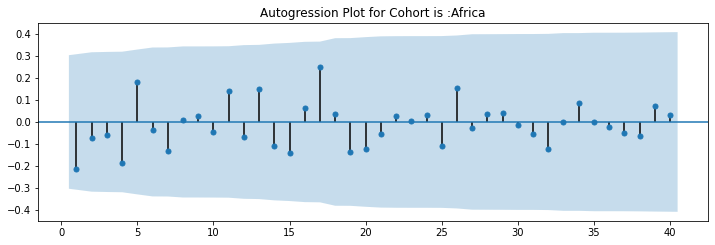

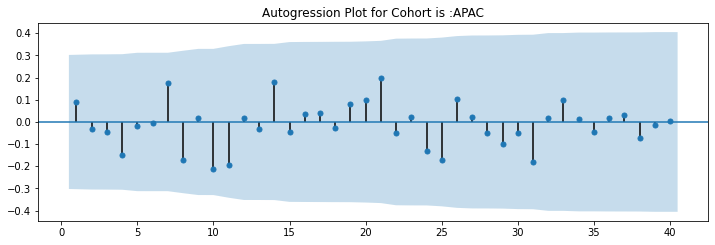

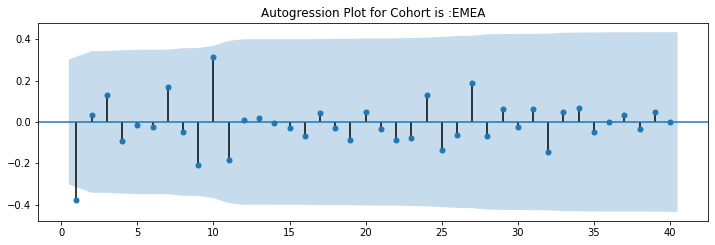

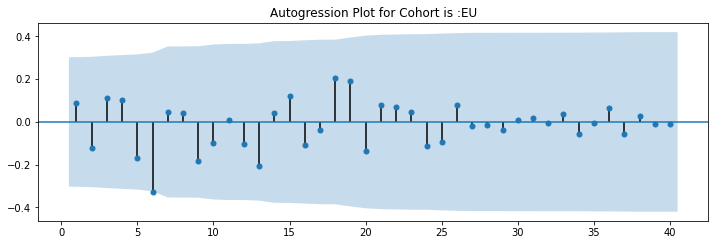

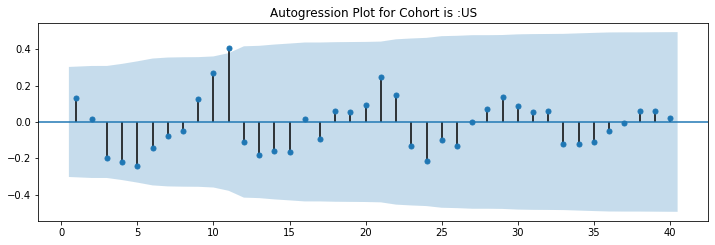

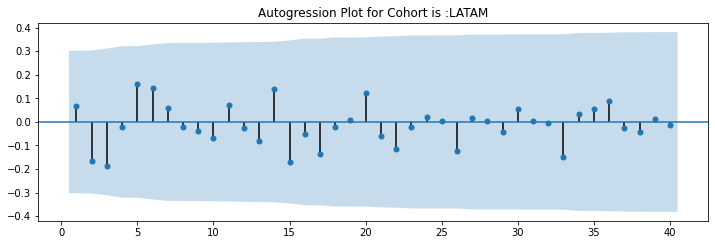

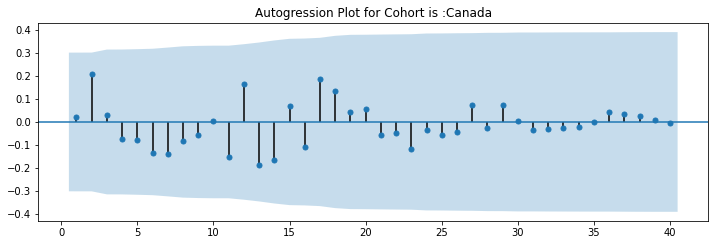

In [270]:
array=np.zeros([50,6])
for index in cohort:
     monthly_cohort=cohort[index].resample('M').mean()
     x_Month=monthly_cohort['Sales']
     print(x_Month[0:3])
     fig= plt.figure(figsize=(12,8))
     ax = fig.add_subplot(211)
     fig = sm.graphics.tsa.plot_acf(x_Month, lags=40, zero=False, ax=ax)
     plt.title('Autogression Plot for Cohort is :'+ str(Market_List[index]))


In [271]:
training_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,0.0,106.140,35.46,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2011-01-01,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.036,9.72,Medium,2011-01-01 00:00:00+00:00,2011,01,01
2011-01-01,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.640,8.17,High,2011-01-01 00:00:00+00:00,2011,01,01


In [272]:
df3 = training_data.groupby(Vector2)['Sales'].mean()

In [273]:
df3

Market  Category       
APAC    Furniture          559.682778
        Office Supplies    141.649615
        Technology         568.283771
Africa  Furniture          321.186781
        Office Supplies     88.914716
        Technology         349.462972
Canada  Furniture          185.928333
        Office Supplies    115.064725
        Technology         367.580556
EMEA    Furniture          299.088766
        Office Supplies     82.627403
        Technology         305.174846
EU      Furniture          522.323602
        Office Supplies    158.633852
        Technology         577.696658
LATAM   Furniture          331.942551
        Office Supplies     96.277158
        Technology         380.339615
US      Furniture          357.774597
        Office Supplies    115.823716
        Technology         463.420324
Name: Sales, dtype: float64

In [274]:
object2 = training_data.groupby(Vector2)['Sales']

In [275]:
object2.groups.keys()

dict_keys([('APAC', 'Furniture'), ('APAC', 'Office Supplies'), ('APAC', 'Technology'), ('Africa', 'Furniture'), ('Africa', 'Office Supplies'), ('Africa', 'Technology'), ('Canada', 'Furniture'), ('Canada', 'Office Supplies'), ('Canada', 'Technology'), ('EMEA', 'Furniture'), ('EMEA', 'Office Supplies'), ('EMEA', 'Technology'), ('EU', 'Furniture'), ('EU', 'Office Supplies'), ('EU', 'Technology'), ('LATAM', 'Furniture'), ('LATAM', 'Office Supplies'), ('LATAM', 'Technology'), ('US', 'Furniture'), ('US', 'Office Supplies'), ('US', 'Technology')])

In [276]:
validation_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_c,Year,Month,Day
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07-01,27884,ID-2014-72110,2014-07-01,11/1/2014,Standard Class,DP-13165,David Philippe,Consumer,Albury,New South Wales,...,3810.996,14,0.1,-42.504,96.85,Medium,2014-07-01 00:00:00+00:00,2014,07,01
2014-07-01,27883,ID-2014-72110,2014-07-01,11/1/2014,Standard Class,DP-13165,David Philippe,Consumer,Albury,New South Wales,...,1788.588,4,0.1,99.348,88.52,Medium,2014-07-01 00:00:00+00:00,2014,07,01
2014-07-01,47544,RS-2014-9050,2014-07-01,9/1/2014,Second Class,DV-3045,Darrin Van Huff,Corporate,Kaliningrad,Kaliningrad,...,195.720,4,0.0,17.520,26.18,High,2014-07-01 00:00:00+00:00,2014,07,01


In [277]:
validation_data_furniture=validation_data[validation_data['Category']=='Furniture']
validation_data_technology=validation_data[validation_data['Category']=='Technology']
validation_data_office=validation_data[validation_data['Category']=='Office Supplies']

In [278]:
#validation_data2=validation_data.resample('M').mean()
object_valid=validation_data.groupby(Vector2)['Sales']

In [279]:
object_valid

In [280]:
#validation_data2

In [281]:
object_valid.groups.keys()

dict_keys([('APAC', 'Furniture'), ('APAC', 'Office Supplies'), ('APAC', 'Technology'), ('Africa', 'Furniture'), ('Africa', 'Office Supplies'), ('Africa', 'Technology'), ('Canada', 'Furniture'), ('Canada', 'Office Supplies'), ('Canada', 'Technology'), ('EMEA', 'Furniture'), ('EMEA', 'Office Supplies'), ('EMEA', 'Technology'), ('EU', 'Furniture'), ('EU', 'Office Supplies'), ('EU', 'Technology'), ('LATAM', 'Furniture'), ('LATAM', 'Office Supplies'), ('LATAM', 'Technology'), ('US', 'Furniture'), ('US', 'Office Supplies'), ('US', 'Technology')])

In [282]:
object2.dtype

Market  Category       
APAC    Furniture          float64
        Office Supplies    float64
        Technology         float64
Africa  Furniture          float64
        Office Supplies    float64
        Technology         float64
Canada  Furniture          float64
        Office Supplies    float64
        Technology         float64
EMEA    Furniture          float64
        Office Supplies    float64
        Technology         float64
EU      Furniture          float64
        Office Supplies    float64
        Technology         float64
LATAM   Furniture          float64
        Office Supplies    float64
        Technology         float64
US      Furniture          float64
        Office Supplies    float64
        Technology         float64
Name: Sales, dtype: object

In [283]:
type(object2)

pandas.core.groupby.generic.SeriesGroupBy

In [284]:
dict1=dict(tuple(object2)) 
dict1

{('APAC', 'Furniture'): Order Date
 2011-01-01     113.6700
 2011-01-03     351.7500
 2011-01-03     238.9290
 2011-01-04     567.6000
 2011-01-06    1037.7096
                 ...    
 2013-12-31     706.1580
 2013-12-31     499.4400
 2013-12-31     179.9658
 2013-12-31     143.3700
 2013-12-31     171.3600
 Name: Sales, Length: 1947, dtype: float64,
 ('APAC', 'Office Supplies'): Order Date
 2011-01-01    120.366
 2011-01-01     55.242
 2011-01-02    162.720
 2011-01-02    352.350
 2011-01-02     40.680
                ...   
 2012-12-31      7.314
 2013-12-31    498.000
 2013-12-31    170.964
 2013-12-31     59.400
 2013-12-31     46.530
 Name: Sales, Length: 4951, dtype: float64,
 ('APAC', 'Technology'): Order Date
 2011-01-02     285.7800
 2011-01-03     214.7580
 2011-01-03      91.8720
 2011-01-08    1157.5800
 2011-01-08     516.9600
                 ...    
 2013-10-31     220.6500
 2012-12-31     241.3200
 2013-12-31     671.9265
 2013-12-31     115.4400
 2013-12-31      85.93

In [285]:
List1=dict1.keys()

In [286]:
#pd.DataFrame.from_dict(dict1,orient='index')


In [287]:
for key, item in object2:
    print("Key is: " + str(key))
    print(str(item), "\n\n")

Key is: ('APAC', 'Furniture')
Order Date
2011-01-01     113.6700
2011-01-03     351.7500
2011-01-03     238.9290
2011-01-04     567.6000
2011-01-06    1037.7096
                ...    
2013-12-31     706.1580
2013-12-31     499.4400
2013-12-31     179.9658
2013-12-31     143.3700
2013-12-31     171.3600
Name: Sales, Length: 1947, dtype: float64 


Key is: ('APAC', 'Office Supplies')
Order Date
2011-01-01    120.366
2011-01-01     55.242
2011-01-02    162.720
2011-01-02    352.350
2011-01-02     40.680
               ...   
2012-12-31      7.314
2013-12-31    498.000
2013-12-31    170.964
2013-12-31     59.400
2013-12-31     46.530
Name: Sales, Length: 4951, dtype: float64 


Key is: ('APAC', 'Technology')
Order Date
2011-01-02     285.7800
2011-01-03     214.7580
2011-01-03      91.8720
2011-01-08    1157.5800
2011-01-08     516.9600
                ...    
2013-10-31     220.6500
2012-12-31     241.3200
2013-12-31     671.9265
2013-12-31     115.4400
2013-12-31      85.9320
Name: Sale

In [288]:
for key, item in object_valid:
    print("Key is: " + str(key))
    print(str(item), "\n\n")


Key is: ('APAC', 'Furniture')
Order Date
2014-07-02     706.1580
2014-07-02     111.0600
2014-07-03     263.6550
2014-07-03     127.4130
2014-07-04     200.7600
                ...    
2014-10-31     106.0200
2014-12-31    1091.2806
2014-12-31    1048.7313
2014-12-31     292.7592
2014-12-31     364.5900
Name: Sales, Length: 482, dtype: float64 


Key is: ('APAC', 'Office Supplies')
Order Date
2014-07-01    3810.9960
2014-07-01    1788.5880
2014-07-01      23.7600
2014-07-02     182.5500
2014-07-02      88.7400
                ...    
2014-12-31      20.9244
2014-12-31      67.2000
2014-12-31      72.0000
2014-12-31      39.4200
2014-12-31      79.4700
Name: Sales, Length: 1226, dtype: float64 


Key is: ('APAC', 'Technology')
Order Date
2014-07-01     116.1675
2014-07-02     340.4826
2014-07-03      61.8000
2014-07-03      81.4800
2014-07-04    3271.2000
                ...    
2014-12-31     300.2400
2014-12-31     276.6000
2014-12-31     171.9900
2014-12-31     293.6208
2014-12-31   

In [289]:
Market_List

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [290]:
Category_List=training_data2['Category'].unique()

In [291]:
object2.get_group(('APAC','Technology'))

Order Date
2011-01-02     285.7800
2011-01-03     214.7580
2011-01-03      91.8720
2011-01-08    1157.5800
2011-01-08     516.9600
                ...    
2013-10-31     220.6500
2012-12-31     241.3200
2013-12-31     671.9265
2013-12-31     115.4400
2013-12-31      85.9320
Name: Sales, Length: 1958, dtype: float64

In [292]:
#Create a Dataframe by looping
df1=object2.get_group((Market_List[0],Category_List[0])).to_frame()

In [293]:
object2

In [294]:
Category_List

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [295]:
for i in range(len(Market_List)):
  for j in range(len(Category_List)):
     df1=object2.get_group((Market_List[0],Category_List[0])).to_frame()

In [296]:

df1

,Sales
Order Date,
2011-01-01,408.300
2011-01-02,206.400
2011-01-03,25.317
2011-01-06,21.180
2011-01-06,10.860
...,...
2013-10-31,2.925
2011-12-31,22.410
2013-12-31,848.400


In [297]:
df1=df1.rename(columns={'Sales':'Sales-Geo1'})

In [298]:
df2=object2.get_group((Market_List[1],Category_List[0])).to_frame()
df2=df2.rename(columns={'Sales':'Sales-Geo2'}).copy()

In [299]:
df3=object2.get_group((Market_List[1],Category_List[0])).to_frame()
df3=df3.rename(columns={'Sales':'Sales-Geo3'})

In [300]:
result = df1.join(df2, how='outer').join(df3, how='outer')
result

,Sales-Geo1,Sales-Geo2,Sales-Geo3
Order Date,,,
2011-01-01,408.300,120.3660,120.3660
2011-01-01,408.300,120.3660,55.2420
2011-01-01,408.300,55.2420,120.3660
2011-01-01,408.300,55.2420,55.2420
2011-01-02,206.400,162.7200,162.7200
...,...,...,...
2014-06-25,12.348,28.4928,70.2000
2014-06-25,12.348,28.4928,60.9765
2014-06-25,12.348,28.4928,27.2160


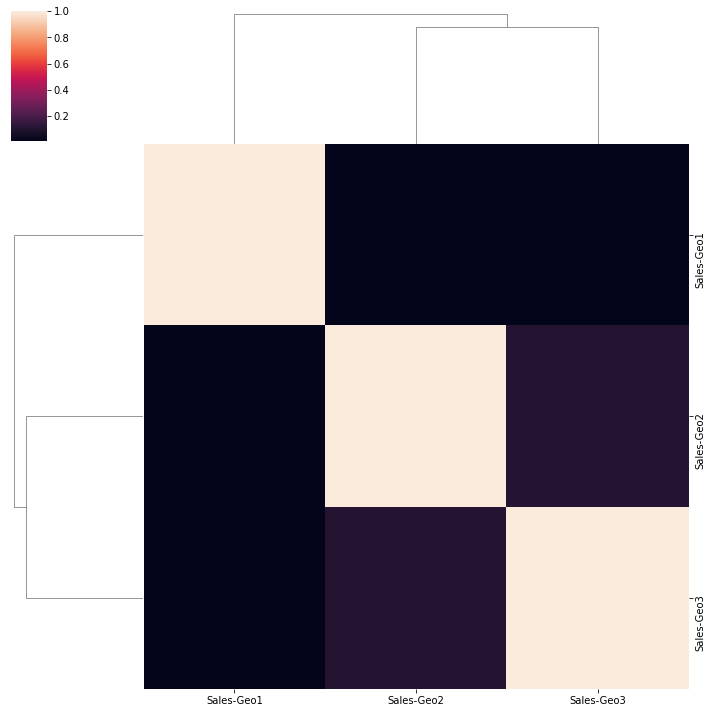

In [301]:
mat=result.corr()
sns.clustermap(mat)

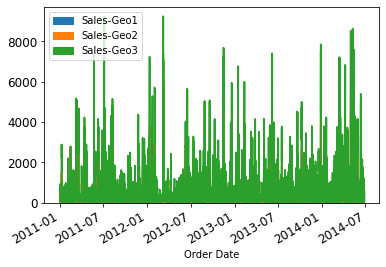

In [302]:
ax=result.iloc[:,:3].plot.area(fontsize=12)
ax.set_xlabel('Order Date')
plt.show()

##Now creating dataframes for each cohort on the go and running model to predict sales 

In [303]:
Market_List
Category_List

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [304]:
#df=object2.get_group((Market_List[i],Category_List[j])).to_frame()
#df
#df2=df.resample('M').mean()
#df2['Sales'].isna().sum()

In [305]:
valid=object_valid.get_group((Market_List[0],Category_List[0])).to_frame()

In [306]:
valid

,Sales
Order Date,
2014-07-03,82.320
2014-07-03,818.280
2014-07-03,57.390
2014-07-03,100.200
2014-07-03,50.760
...,...
2014-10-31,4.530
2014-12-31,126.720
2014-12-31,22.923


In [307]:
df_valid2=valid.resample('M').mean()

In [308]:
df_valid2.values

array([[144.0232    ],
       [ 87.13904545],
       [ 75.50384   ],
       [117.95869737],
       [ 40.77922222],
       [ 85.21735862],
       [ 77.55311628]])

In [309]:
#model=ARIMA(x_month,order=(1,1,1))
#model_fit=model.fit()
#output=model_fit.forecast(steps=7)[0]

In [310]:
output

(array([1808.02994444, 1811.64688889, 1815.26383333, 1818.88077778,
        1822.49772222, 1826.11466667]),
 array([3991.34238286, 5644.61052991, 6913.20779751, 7982.68476572,
        8924.91288955, 9776.75222675]),
 array([[ -6014.85737593,   9630.91726481],
        [ -9251.58645649,  12874.88023427],
        [-11734.37446743,  15364.9021341 ],
        [-13826.89386296,  17464.65541852],
        [-15670.01010645,  19315.00555089],
        [-17335.96758353,  20988.19691686]]))

In [311]:
predictions={}
error_list=[]
P=defaultdict()
error_dict=defaultdict()
k=0
for i in  range(len(Market_List)):
   for j  in range(len(Category_List)):
      df=object2.get_group((Market_List[i],Category_List[j])).to_frame()
      df2=df.resample('M').mean()
      nan_length=df2['Sales'].isna().sum()
      if nan_length >0 :
        print("Series in unforecastable for "+ str(Market_List[i])+str(Category_List[j]))
      else:
       x_month=df2['Sales']
       if(Category_List[j]=='Furniture'):
           model=ARIMA(x_month,order=(1,1,1))
           model_fit=model.fit()
           output=model_fit.forecast(steps=7)[0]
            #Create a validation set
           df2=object_valid.get_group((Market_List[i],Category_List[j])).to_frame()
           df_valid2=df2.resample('M').mean()#resampled mean
           valid_array=df_valid2.values
           valid_array=valid_array.reshape(-1,)
           q=MAPE(output,valid_array)
           error_list.append(q)
           key=str(Market_List[i])+ ':' +str(Category_List[j])
           if key not in predictions:
             predictions[key] = []
           if key not in error_dict:
             error_dict[key] = []
           predictions[key].append(output[0:])
           error_dict[key].append(q)
       else:
           model=ARIMA(x_month,order=(1,1,0))# Lowest Output from Validation Data 
           model_fit=model.fit()
           output=model_fit.forecast(steps=7)[0]
            #Create a validation set
           df2=object_valid.get_group((Market_List[i],Category_List[j])).to_frame()
           df_valid2=df2.resample('M').mean()#resampled mean
           valid_array=df_valid2.values
           valid_array=valid_array.reshape(-1,)
           q=MAPE(output,valid_array)
           error_list.append(q)
           key=str(Market_List[i])+ ':' +str(Category_List[j])
           if key not in predictions:
             predictions[key] = []
           if key not in error_dict:
             error_dict[key]=[]
           predictions[key].append(output[0:])
           error_dict[key].append(q)
  

       
      
    
        

Series in unforecastable for CanadaFurniture
Series in unforecastable for CanadaTechnology


In [312]:
predictions

{'APAC:Furniture': [array([577.00319941, 567.02496635, 565.18430775, 565.16229441,
         565.54672534, 566.02199145, 566.51755807])],
 'APAC:Office Supplies': [array([126.46330119, 115.37884916, 119.60707978, 117.44221627,
         117.94649007, 117.33639047, 117.19154534])],
 'APAC:Technology': [array([568.19867124, 592.53443871, 582.69323973, 587.62257182,
         586.16840617, 587.47304744, 587.58539322])],
 'Africa:Furniture': [array([382.73003737, 353.79736588, 362.49822534, 362.97058505,
         365.24209053, 367.12021621, 369.08435364])],
 'Africa:Office Supplies': [array([138.37873112, 129.98983953, 136.15549543, 133.8197288 ,
         136.44970811, 136.17915723, 137.60282822])],
 'Africa:Technology': [array([340.56573731, 313.1148758 , 323.53270963, 320.57234747,
         322.33821437, 322.43440614, 323.12045823])],
 'Canada:Office Supplies': [array([23.93160679, 22.70305101, 19.94429398, 18.08341341, 15.69568571,
         13.6170962 , 11.35711361])],
 'EMEA:Furniture': [

In [313]:
predictions['Canada:Office Supplies'][0]

array([23.93160679, 22.70305101, 19.94429398, 18.08341341, 15.69568571,
       13.6170962 , 11.35711361])

In [314]:
result=defaultdict()
for key, value in predictions.items():
       result[key]=value[0]

In [315]:
FPRECAST=pd.DataFrame(result)
error_cast=pd.DataFrame(error_dict)

In [316]:
FORECAST=FPRECAST.T
errorcast=error_cast.T

In [317]:
FORECAST=FORECAST.reset_index().copy()
errorcast=errorcast.reset_index().copy()

In [318]:
FORECAST[['Region','Category']]=FORECAST['index'].str.split(':',expand=True)
errorcast[['Region','Category']]=errorcast['index'].str.split(':',expand=True)
errorcast
del errorcast['index']
del FORECAST['index']
final_cast=errorcast.merge(FORECAST,on=['Region','Category'],how='left')

In [319]:
final_cast=errorcast.merge(FORECAST,on=['Region','Category'],how='left')

In [320]:
from google.colab import files
import pandas as pd
final_cast.to_csv('forecast_file.csv')
files.download('forecast_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [321]:
# Validation Set Run for Results2
# predictions4={}
# error_list4=[]
# for i in  range(len(Market_List)):
#    for j  in range(len(Category_List)):
#       df=object2.get_group((Market_List[i],Category_List[j])).to_frame()
#       df2=df.resample('M').mean()
#       nan_length=df2['Sales'].isna().sum()
#       if nan_length >0 :
#         print("Series in unforecastable for "+ str(Market_List[i])+str(Category_List[j]))
#       else:
#        x_month=df2['Sales']
#        model=ARIMA(x_month,order=results2.order)
#        model_fit=model.fit()
#        output=model_fit.forecast(steps=7)[0]
#        #Create a validation set
#        df2=object_valid.get_group((Market_List[i],Category_List[j])).to_frame()
#        df_valid2=df2.resample('M').mean()#resampled mean
#        valid_array=df_valid2.values
#        valid_array=valid_array.reshape(-1,)
#        q=MAPE(output,valid_array)
#        error_list4.append(q)
#        key=str(Market_List[i])+ ':' +str(Category_List[j])
#        if key not in predictions4:
#            predictions4[key] = []
#        predictions4[key].append(output.values)
      
    
        

In [322]:
r=pd.DataFrame(predictions.items())
r.head(1)

,0,1
0,Africa:Office Supplies,"[[138.3787311170389, 129.98983952590558, 136.1..."


In [323]:
# predictions={}
# error_list=[]
# for i in  range(len(Market_List)):
  #  for j  in range(len(Category_List)):
     # df=object2.get_group((Market_List[i],Category_List[j])).to_frame()
      # # df2=df.resample('M').mean()
      # nan_length=df2['Sales'].isna().sum()
      # if nan_length >0 :
       # print("Series in unforecastable for "+ str(Market_List[i])+str(Category_List[j]))
      # # # # else:
      # # # # #  model=SARIMAX(df2,order=(0,1,1),trend='c')
      # # # # #  model_fit=model.fit()
      # # # # #  output=model_fit.forecast(steps=7)
       #Create a validation set
      # # # # #  df_valid=object_valid.get_group((Market_List[i],Category_List[j])).to_frame()#validation _Data
      # # # # #  df_valid2=df_valid.resample('M').mean()#resampled mean 
      # # # # #  valid_array=df_valid2.values#values
      # # # # #  valid_array_new=single_array(valid_array)
      # # # # #  q=MAPE(output,valid_array)
      # # # # #  error_list.append(q)
      # # # #  key=str(Market_List[i])+ str(Category_List[j])
      # # #  if key not in predictions:
          # # #  predictions[key] = []
      #  predictions[key].append(output)
      
    


In [324]:
#single_array(valid_array)


In [325]:
predictions

{'APAC:Furniture': [array([577.00319941, 567.02496635, 565.18430775, 565.16229441,
         565.54672534, 566.02199145, 566.51755807])],
 'APAC:Office Supplies': [array([126.46330119, 115.37884916, 119.60707978, 117.44221627,
         117.94649007, 117.33639047, 117.19154534])],
 'APAC:Technology': [array([568.19867124, 592.53443871, 582.69323973, 587.62257182,
         586.16840617, 587.47304744, 587.58539322])],
 'Africa:Furniture': [array([382.73003737, 353.79736588, 362.49822534, 362.97058505,
         365.24209053, 367.12021621, 369.08435364])],
 'Africa:Office Supplies': [array([138.37873112, 129.98983953, 136.15549543, 133.8197288 ,
         136.44970811, 136.17915723, 137.60282822])],
 'Africa:Technology': [array([340.56573731, 313.1148758 , 323.53270963, 320.57234747,
         322.33821437, 322.43440614, 323.12045823])],
 'Canada:Office Supplies': [array([23.93160679, 22.70305101, 19.94429398, 18.08341341, 15.69568571,
         13.6170962 , 11.35711361])],
 'EMEA:Furniture': [

In [326]:
p=predictions.keys()

In [327]:
error_list

[74.10119255500575,
 51.23689673233116,
 20.500821583651724,
 35.40469916078056,
 12.466927274936555,
 9.613939645469147,
 18.823581303217477,
 59.656883602032295,
 34.47178196684927,
 11.259301492812805,
 13.457440653627598,
 10.598404107056867,
 40.3444587491805,
 12.848352010835622,
 20.61099803658956,
 14.411179730485152,
 16.431061813765545,
 9.795343408803356,
 76.22301656583339]

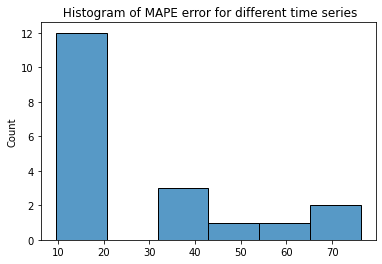

In [328]:


g=sns.histplot(error_list).set(title=" Histogram of MAPE error for different time series")




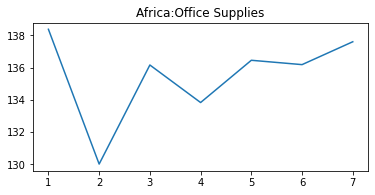

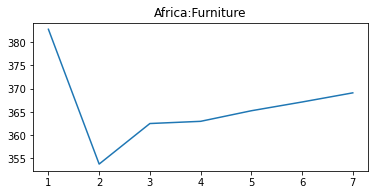

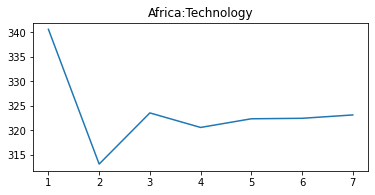

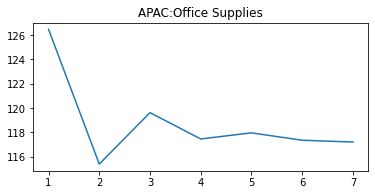

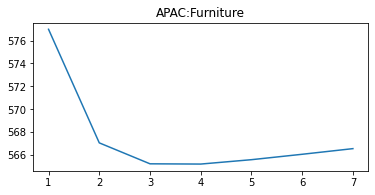

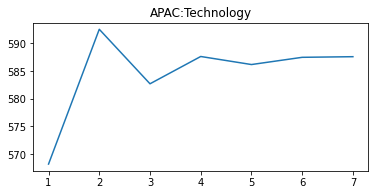

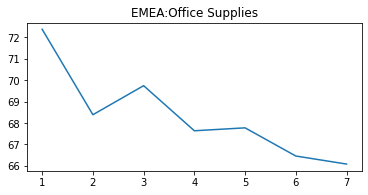

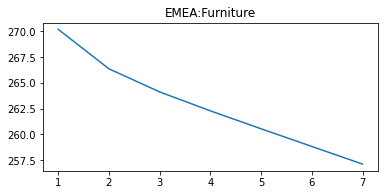

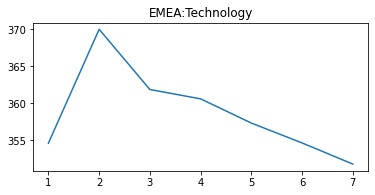

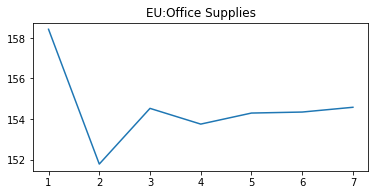

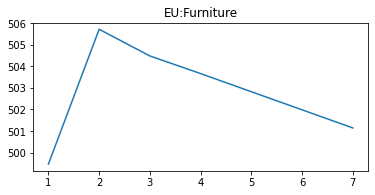

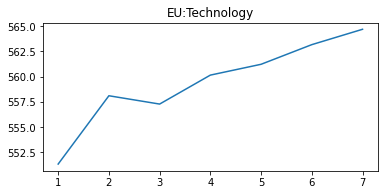

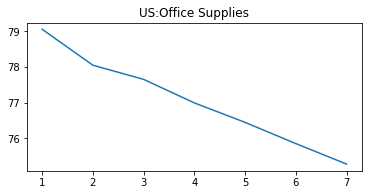

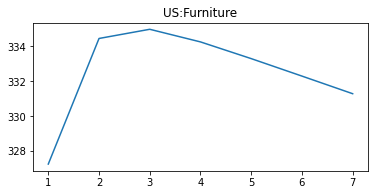

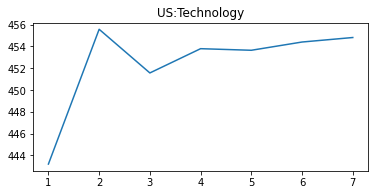

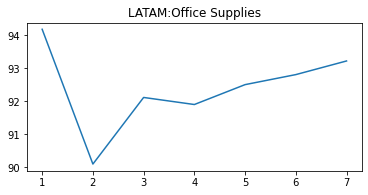

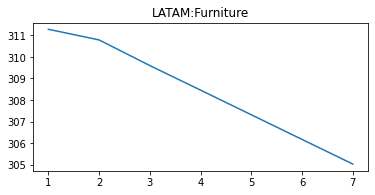

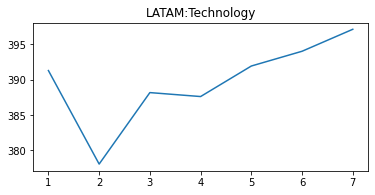

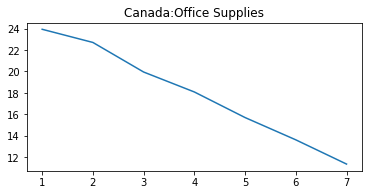

In [329]:
for k,v in predictions.items():
   m=v[0]
   fig= plt.figure(figsize=(6,6))
   x=np.linspace(1,7,7)
   ax = fig.add_subplot(211)
   ax.set_xticks(x)
   ax.set_xticklabels(x.astype(int))
   ax.plot(x,m)
   ax.set_title(str(k))



In [330]:
import re
for k,v  in predictions.items():
   k=str(k)
   m=k.split(':')
   print(m[0]+':'+m[1])

Africa:Office Supplies
Africa:Furniture
Africa:Technology
APAC:Office Supplies
APAC:Furniture
APAC:Technology
EMEA:Office Supplies
EMEA:Furniture
EMEA:Technology
EU:Office Supplies
EU:Furniture
EU:Technology
US:Office Supplies
US:Furniture
US:Technology
LATAM:Office Supplies
LATAM:Furniture
LATAM:Technology
Canada:Office Supplies


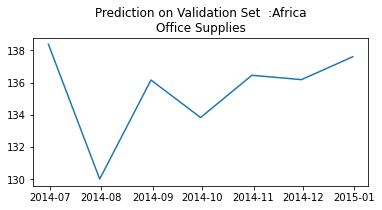

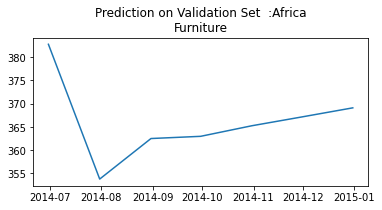

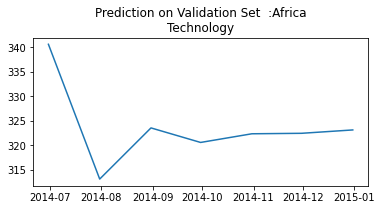

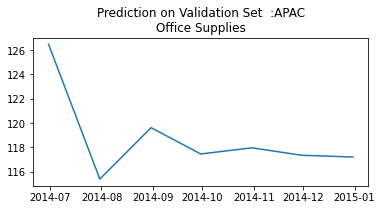

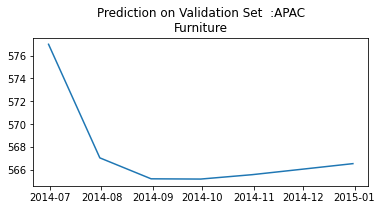

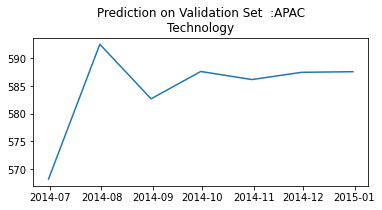

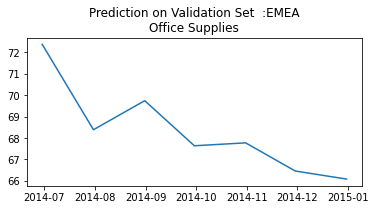

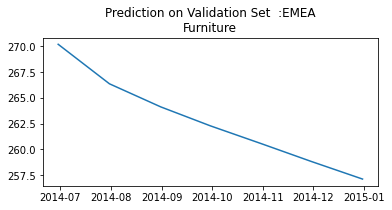

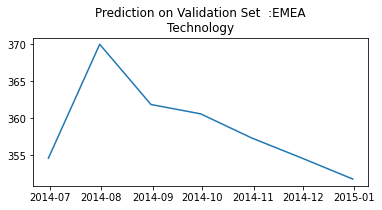

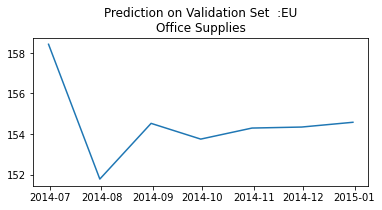

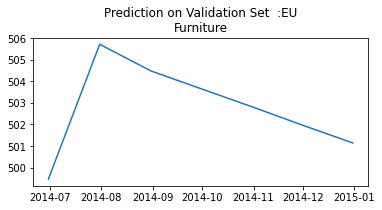

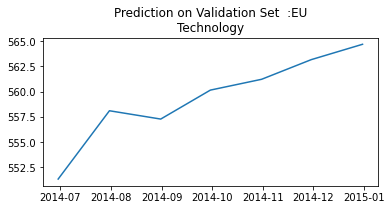

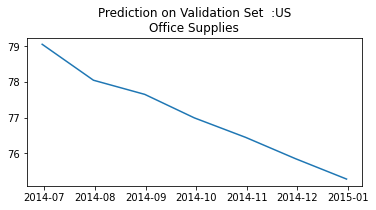

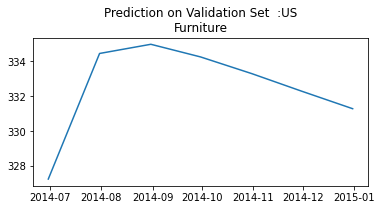

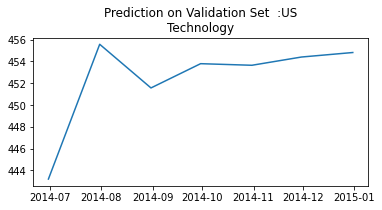

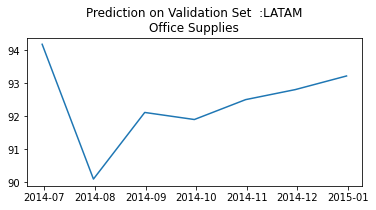

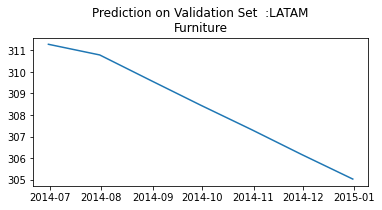

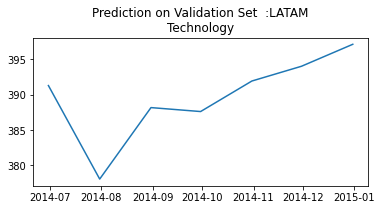

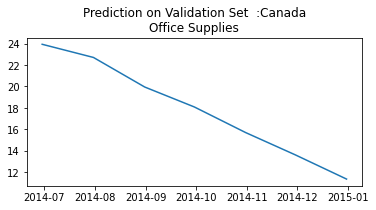

In [331]:
for k,v in predictions.items():
   key=str(k).split(':')
   m=v[0]
   fig= plt.figure(figsize=(6,6))
   ax = fig.add_subplot(211)
   ax.plot(df_valid2.index,m)
   ax.set_title('Prediction on Validation Set  :'+ key[0]+'\n'+key[1])

In [332]:
##Lets create clustering of data


## RECURRENT NEURAL NET CREATING A SEQUENCE OF 4 TIME SERIES LENGTH 

In [333]:
# Step 1 Libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np



1 Furniture Product

In [334]:
x_train_furniture=df_first.values

In [335]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x_train_furniture)


In [336]:
SEQ_LEN = 3
DATA_LEN = scaled.shape[0]# Length 

X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,1)#preparing training data from 0:-6

for i in range(1,SEQ_LEN):
    X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)## Each X train has been divided into 4 feature vectors 
    
Y_train = scaled[SEQ_LEN:-1,-1]# We cannot predict 1st 4 Observations as they are used a features so have to start from 5 



In [337]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics = ['mae'])

In [338]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics = ['mae'])

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.2111 - mae: 0.3964 - val_loss: 0.2042 - val_mae: 0.4484
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2017 - mae: 0.3847 - val_loss: 0.1919 - val_mae: 0.4345
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1927 - mae: 0.3733 - val_loss: 0.1801 - val_mae: 0.4207
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1840 - mae: 0.3624 - val_loss: 0.1687 - val_mae: 0.4070
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1756 - mae: 0.3515 - val_loss: 0.1578 - val_mae: 0.3933
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1675 - mae: 0.3407 - val_loss: 0.1473 - val_mae: 0.3797
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1598 - mae: 0.3299 - val_loss: 0.1372 - val_mae: 0.3662
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1523 - mae: 0.3196

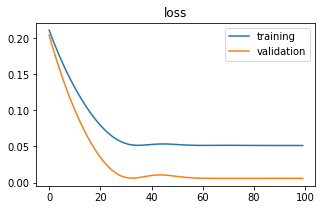

In [339]:
epochs = 100
validation_split = 0.1

history = model.fit(X_train, Y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

In [340]:
x_test=df_valid_furniture.values

In [341]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_valid = scaler.fit_transform(x_test)

In [342]:
X_test=scaled_valid[0:-SEQ_LEN-1,:].reshape(-1,1,1)#NEW SHAPE BY TAKING VECTOR OF 4
for i in range(1,SEQ_LEN):
    X_test = np.append(X_test, scaled_valid[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)


y_hat_valid=model.predict(X_test)

In [343]:
df_valid_furniture

,Monthly_Quantity
Synthetic_Date,
2014-06-01,997.700
2014-07-01,6156.531
2014-08-01,4596.342
2014-09-01,9531.501
2014-10-01,5954.845
2014-11-01,8363.685
2014-12-01,6555.152


In [344]:
y_hat_valid=model.predict(X_test)

In [345]:
y_hat_valid

array([[0.35797912],
       [0.48613766],
       [0.5035316 ]], dtype=float32)

In [346]:
y_hat_valid_unscaled=scaler.inverse_transform(y_hat_valid)

In [347]:
yactual=x_test[SEQ_LEN:-1,-1]

In [348]:
mape_furniture_valid=MAPE(y_hat_valid,yactual)

In [349]:
list_m=[mape_furniture_model1,mape_furniture_model2,mape_furniture_model3,mape_furniture_valid]
x=['model-110 ARIMA ','model: 100 ARIMA','model:3,2,0 SARIMAX','Model-RNN,Lag=3,50_LSTM']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Validation Error MAPE-Furniture')

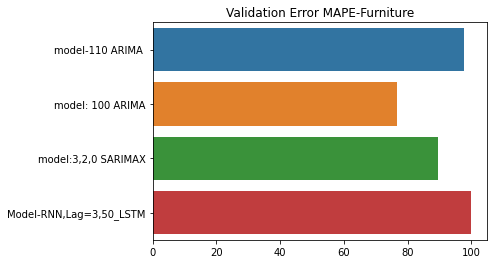

In [350]:
sns.barplot(list_m,x).set_title("Validation Error MAPE-Furniture")


*italicized text*

In [351]:
Data=pd.read_csv('/content/drive/My Drive/Wisconsin_Project/inflation.csv')

In [352]:
Data.head(1)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,CPI,TOT,AGRWTH,M,2006-01,1.209677,NaN


In [353]:
Data['LOCATION'].value_counts()

CHE          195
IRL          195
EST          195
TUR          195
BEL          195
IDN          195
SVN          195
NLD          195
MEX          195
LUX          195
CHL          195
KOR          195
ISL          195
HUN          195
COL          195
LTU          195
OECDE        194
OECD         194
G-7          194
ZAF          194
LVA          194
RUS          194
ISR          194
SAU          194
IND          194
EA19         194
G-20         194
CHN          194
AUT          194
BRA          194
USA          194
CAN          194
CZE          194
DNK          194
FIN          194
FRA          194
DEU          194
GRC          194
ITA          194
JPN          194
NOR          194
POL          194
PRT          194
SVK          194
ESP          194
SWE          194
GBR          194
EU27_2020    194
ARG           51
Name: LOCATION, dtype: int64

In [354]:
Data2=Data[Data['LOCATION']=='USA']

In [355]:
Data3=Data2[['TIME','Value']]

In [356]:
Data3['TIME']=pd.to_datetime(Data3['TIME'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [357]:
Data3['Year']=Data3['TIME'].dt.strftime("%Y")# Only Order Year
Data3['Month']=Data3['TIME'].dt.strftime("%m")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [358]:
Data3=Data3.rename(columns={'TIME':'Synthetic_Date'})

In [359]:
# Data3=Data3.rename(columns={'Order Date':'Synthetic Date'}).copy()
# Data3=Data3.rename(columns={'Synthetic Date':'Synthetic_Date'})

In [360]:
Data4=Data3.reset_index()

In [361]:
Data5=Data4.iloc[:,1:]

In [362]:
Data5

,Synthetic_Date,Value,Year,Month
0,2006-01-01,3.985317,2006,01
1,2006-02-01,3.597497,2006,02
2,2006-03-01,3.362649,2006,03
3,2006-04-01,3.545735,2006,04
4,2006-05-01,4.166667,2006,05
...,...,...,...,...
189,2021-10-01,6.221869,2021,10
190,2021-11-01,6.809003,2021,11
191,2021-12-01,7.036403,2021,12
192,2022-01-01,7.479873,2022,01


In [363]:

df_first_oecd=df_first.reset_index()

In [364]:
df_first_oecd.head(2)

,Synthetic_Date,Monthly_Quantity
0,2011-01-01,1674.203
1,2011-02-01,202.888


In [365]:
df_first_oecd.dtypes

Synthetic_Date      datetime64[ns]
Monthly_Quantity           float64
dtype: object

In [366]:
Data4.head(1)

,index,Synthetic_Date,Value,Year,Month
0,5248,2006-01-01,3.985317,2006,01


In [367]:
Data5.tail(2)

,Synthetic_Date,Value,Year,Month
192,2022-01-01,7.479873,2022,01
193,2022-02-01,7.871064,2022,02


In [368]:
oecd_data_furniture_us=df_first_oecd.merge(Data5,on='Synthetic_Date',how='left')

In [369]:
oecd_data_furniture_us

,Synthetic_Date,Monthly_Quantity,Value,Year,Month
0,2011-01-01,1674.2030,1.631847,2011,01
1,2011-02-01,202.8880,2.107585,2011,02
2,2011-03-01,3496.5940,2.681603,2011,03
3,2011-04-01,2965.6380,3.163631,2011,04
4,2011-05-01,1955.6020,3.568646,2011,05
5,2011-06-01,2032.8220,3.558828,2011,06
6,2011-07-01,5836.9660,3.628716,2011,07
7,2011-08-01,3830.8080,3.771208,2011,08
8,2011-09-01,6603.5670,3.868357,2011,09
9,2011-10-01,4470.3000,3.525200,2011,10


In [370]:
oecd_data_furniture_us2=oecd_data_furniture_us.iloc[:,1:3]

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.2255 - mae: 0.4134 - val_loss: 0.2257 - val_mae: 0.4717
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.2133 - mae: 0.3985 - val_loss: 0.2146 - val_mae: 0.4598
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2015 - mae: 0.3836 - val_loss: 0.2038 - val_mae: 0.4479
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 0.1903 - mae: 0.3690 - val_loss: 0.1934 - val_mae: 0.4362
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1795 - mae: 0.3548 - val_loss: 0.1833 - val_mae: 0.4244
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.1693 - mae: 0.3407 - val_loss: 0.1735 - val_mae: 0.4127
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1595 - mae: 0.3267 - val_loss: 0.1639 - val_mae: 0.4010
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1502 - mae: 0.3135

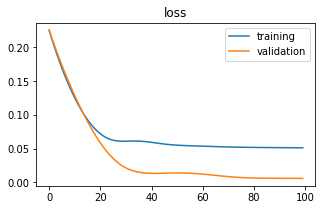

In [371]:
x_train_furniture=oecd_data_furniture_us2.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x_train_furniture)
SEQ_LEN = 3
DATA_LEN = scaled.shape[0]# Length 

X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,2)#preparing training data from 0:-6

for i in range(1,SEQ_LEN):
    X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,2), axis=1)## Each X train has been divided into 4 feature vectors 

Y_train = scaled[SEQ_LEN:-1,0]#
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics = ['mae'])

epochs = 100
validation_split = 0.1

history = model.fit(X_train, Y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

In [372]:
def correction_nn(X):
    X.reset_index
    

In [373]:

df_valid_furn=df_valid_furniture.reset_index()

In [374]:
df_valid_furn.head(10)

,Synthetic_Date,Monthly_Quantity
0,2014-06-01,997.700
1,2014-07-01,6156.531
2,2014-08-01,4596.342
3,2014-09-01,9531.501
4,2014-10-01,5954.845
5,2014-11-01,8363.685
6,2014-12-01,6555.152


In [375]:
x_valid2=df_valid_furn.merge(Data5,on='Synthetic_Date',how='left')

In [376]:
x_valid3=x_valid2.iloc[:,1:3]

In [377]:
x_valid3

,Monthly_Quantity,Value
0,997.700,2.072341
1,6156.531,1.992329
2,4596.342,1.699611
3,9531.501,1.657919
4,5954.845,1.664340
5,8363.685,1.322355
6,6555.152,0.756493


In [409]:
x_valid3_furn=x_valid3

In [410]:
x_valid3_off_1=df_valid_office_supply.merge(Data5,on='Synthetic_Date',how='left')

In [411]:
x_valid3_off=x_valid3_off_1.iloc[:,1:3]

In [412]:
x_valid3_tech_1=df_valid_technology.merge(Data5,on='Synthetic_Date',how='left')

In [413]:
x_valid3_tech=x_valid3_tech_1.iloc[:,1:3]

In [378]:
#Converting validation set to a tensor/3 dimensitonal matrix 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x_valid3)

In [379]:
x_valid = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,2)

In [380]:
x_valid.shape

(3, 1, 2)

In [381]:
x_valid = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,2)#preparing training data from 0:-6

for i in range(1,SEQ_LEN):
  x_valid = np.append(x_valid, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,2), axis=1)## Each X train has been divided into 3 fe

In [382]:
Y_valid=x_valid3.iloc[SEQ_LEN:-1,0]


In [383]:
Y_valid_val=Y_valid.values
Y_valid_n = Y_valid_val.reshape(1, -1)#  converts into two dimensional array

In [384]:
Y_valid_n.shape

(1, 3)

In [385]:
scaler_1=MinMaxScaler(feature_range=(0,1))
y_valid=scaler_1.fit_transform(Y_valid_n)

In [386]:
x_valid.shape

(3, 3, 2)

In [387]:
y_hat=model.predict(x_valid)

In [388]:
y_hat_new=y_hat.reshape(1,-1)

In [389]:
y_hat_new.shape

(1, 3)

In [390]:
y_hat_unscale_new=scaler_1.inverse_transform(y_hat_new)

In [391]:
y_hat_unscale_new

array([[9531.89 , 5955.332, 8364.182]], dtype=float32)

In [392]:
Y_valid_val

array([9531.501, 5954.845, 8363.685])

In [393]:
MAPE(y_hat_unscale_new,Y_valid_val)

0.006064771599697432

In [394]:
def rnn_training_model(df,df_valid,k):
    x_train=df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(x_train)
    SEQ_LEN = k
    DATA_LEN = scaled.shape[0]# Length 
    X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,1)#preparing training data from 0:-6
    for i in range(1,SEQ_LEN):
         X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)## Each X train has been divided into 1 feature vectors 
    Y_train = scaled[SEQ_LEN:-1,-1]# We cannot predict 1st 4 Observations as they are used a features so have to start from 5 
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam',metrics = ['mae'])
    epochs = 100
    validation_split = 0.1
    history = model.fit(X_train, Y_train, batch_size=128,epochs=epochs,validation_split=validation_split)
    x_test=df_valid.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_valid = scaler.fit_transform(x_test)
    X_test=scaled_valid[0:-SEQ_LEN-1,:].reshape(-1,1,1)
    for i in range(1,SEQ_LEN):
        X_test = np.append(X_test, scaled_valid[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)
    y_hat_valid=model.predict(X_test)
    y_hat_valid_unscaled=scaler.inverse_transform(y_hat_valid)
    yactual=x_test[SEQ_LEN:-1,-1]
    mape1=MAPE(y_hat_valid,yactual)
    return mape1

Data Preperation for merging data with OECD DATA  FOR 3 PRODUCTS 

In [395]:
oecd_data_furniture_us=df_first_oecd.merge(Data5,on='Synthetic_Date',how='left')

In [397]:
df_second_oecd=df_second.reset_index()

In [398]:
df_third_oecd=df_third.reset_index()

In [399]:
oecd_data_tech_us=df_second_oecd.merge(Data5,on='Synthetic_Date',how='left')

In [400]:
oecd_data_office_us=df_third_oecd.merge(Data5,on='Synthetic_Date',how='left')
oecd_data_office_us2=oecd_data_office_us.iloc[:,1:3]
oecd_data_tech_us2=oecd_data_tech_us.iloc[:,1:3]

In [401]:
oecd_data_furniture_us2=oecd_data_furniture_us.iloc[:,1:3]

In [408]:
x_valid2

,Synthetic_Date,Monthly_Quantity,Value,Year,Month
0,2014-06-01,997.700,2.072341,2014,06
1,2014-07-01,6156.531,1.992329,2014,07
2,2014-08-01,4596.342,1.699611,2014,08
3,2014-09-01,9531.501,1.657919,2014,09
4,2014-10-01,5954.845,1.664340,2014,10
5,2014-11-01,8363.685,1.322355,2014,11
6,2014-12-01,6555.152,0.756493,2014,12


In [402]:
def rnn_multivariate(oecd_product,oecd_valid,k):
    x_train=oecd_product.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(x_train)
    SEQ_LEN = k
    DATA_LEN = scaled.shape[0]# Length 
    X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,2)#preparing training data from 0:-6
    for i in range(1,SEQ_LEN):
        X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,2), axis=1)## Each X train has been divided into 4 feature vectors 
    Y_train = scaled[SEQ_LEN:-1,0]#
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam',metrics = ['mae'])
    epochs = 100
    validation_split = 0.1
    history = model.fit(X_train, Y_train, batch_size=128,epochs=epochs,validation_split=validation_split)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(x_valid3)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(x_valid3)
    x_valid = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,2)
    x_valid = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,2)#preparing training data from 0:-6
    for i in range(1,SEQ_LEN):
      x_valid = np.append(x_valid, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,2), axis=1)#
    Y_valid=oecd_valid.iloc[SEQ_LEN:-1,0]
    Y_valid_val=Y_valid.values
    Y_valid_n = Y_valid_val.reshape(1, -1)
    scaler_1=MinMaxScaler(feature_range=(0,1))
    y_valid=scaler_1.fit_transform(Y_valid_n)
    y_hat=model.predict(x_valid)
    y_hat_new=y_hat.reshape(1,-1)
    y_hat_unscale_new=scaler_1.inverse_transform(y_hat_new)
    score_product=MAPE(y_hat_unscale_new,Y_valid_val)
    return score_product

In [414]:
p_tech=rnn_multivariate(oecd_data_tech_us2,x_valid3_tech,3)

Epoch 1/100
2/2 [==============================] - 2s 370ms/step - loss: 0.0429 - mae: 0.1473 - val_loss: 0.0980 - val_mae: 0.2640
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0365 - mae: 0.1272 - val_loss: 0.0882 - val_mae: 0.2457
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0319 - mae: 0.1151 - val_loss: 0.0796 - val_mae: 0.2295
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0283 - mae: 0.1057 - val_loss: 0.0721 - val_mae: 0.2141
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0263 - mae: 0.1011 - val_loss: 0.0655 - val_mae: 0.2010
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0253 - mae: 0.1016 - val_loss: 0.0601 - val_mae: 0.1898
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0250 - mae: 0.1048 - val_loss: 0.0561 - val_mae: 0.1809
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0250 - mae: 0.1

In [415]:
p_office=rnn_multivariate(oecd_data_office_us2,x_valid3_off,3)

Epoch 1/100
2/2 [==============================] - 2s 380ms/step - loss: 0.0953 - mae: 0.2427 - val_loss: 0.1375 - val_mae: 0.3157
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0822 - mae: 0.2168 - val_loss: 0.1233 - val_mae: 0.2919
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0707 - mae: 0.1940 - val_loss: 0.1105 - val_mae: 0.2685
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0614 - mae: 0.1772 - val_loss: 0.0987 - val_mae: 0.2460
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0539 - mae: 0.1628 - val_loss: 0.0883 - val_mae: 0.2266
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0477 - mae: 0.1533 - val_loss: 0.0791 - val_mae: 0.2097
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0432 - mae: 0.1478 - val_loss: 0.0710 - val_mae: 0.1943
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0404 - mae: 0.1

In [416]:
x_valid3_furn

,Monthly_Quantity,Value
0,997.700,2.072341
1,6156.531,1.992329
2,4596.342,1.699611
3,9531.501,1.657919
4,5954.845,1.664340
5,8363.685,1.322355
6,6555.152,0.756493


In [417]:
p=rnn_multivariate(oecd_data_furniture_us2,x_valid3_furn,3)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.1760 - mae: 0.3518 - val_loss: 0.1633 - val_mae: 0.4001
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1651 - mae: 0.3368 - val_loss: 0.1523 - val_mae: 0.3861
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1546 - mae: 0.3222 - val_loss: 0.1416 - val_mae: 0.3720
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1447 - mae: 0.3083 - val_loss: 0.1313 - val_mae: 0.3578
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.1352 - mae: 0.2943 - val_loss: 0.1212 - val_mae: 0.3434
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1263 - mae: 0.2802 - val_loss: 0.1115 - val_mae: 0.3290
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 0.1179 - mae: 0.2663 - val_loss: 0.1022 - val_mae: 0.3145
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 0.1100 - mae: 0.2543

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Multivariate RNN')

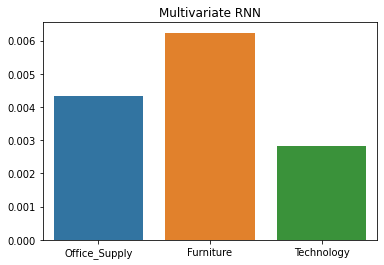

In [418]:
Product_List=['Office_Supply','Furniture','Technology']
error_score=[p_office,p,p_tech]
sns.barplot(Product_List,error_score).set_title("Multivariate RNN")